Proteomics data from https://clue.io/connectopedia/proteomic_data_types

CLUE provides data from two types of mass spectrometry-based proteomic assays developed by the Proteomic Characterization Center for Signaling and Epigenetics (PCCSE). To induce and then characterize cellular responses, **cells are treated with small molecules or genetic perturbations (gene knockdown or overexpression) and then assayed for changes in phosphorylation and chromatin modification**. Phosphorylation levels for ~100 phosphosites are measured using the P100 assay, and global histone modification is assessed by the GCP (Global Chromatin Profiling) assay. 



doi:10.1016/j.cels.2018.03.012


Yet it is known that mRNA levels alone do not fully capture cell state, and the vocabulary of this
universal language may need to be extended to describe some of the critical functions of cellular responses.
Early studies recognized apparent discordance between mRNA and protein levels on a large scale
(Greenbaum et al., 2003), and current studies suggest there is correlation coefficient of about ~0.5 between
mRNA and protein levels (Mertins et al., 2016). More recently, Li and colleagues have shown that
phosphorylation events show low correlation with mRNA levels from their corresponding genes (Li et al., 2017), and therefore phosphoproteomic data are likely to add value to gene expression measurements. These
observations underscore the importance of exploring complementary readouts to gene expression profiling.

1) targeted kinase inhibitors, a class of drugs that is rapidly expanding (Wu et al., 2015), and
2) inhibitors of chromatin-modifying enzymes and sensors of chromatin state, which have emerged as exciting
new therapeutic modalities

Unlike recent proteomic resources characterizing the proteomic states associated with genetic
variation in tumors and cell lines (Li et al., 2017; Mertins et al., 2016), this resource characterizes the proteomic responses to systematic application of drug perturbagens



In this initial dataset, we profiled 90 small molecules spanning a variety of mechanisms of action
(MoAs) with focused subsets of kinase inhibitors and epigenetically active compounds (Table S1). We utilized
five widely studied cancer cell models (representing breast, lung, pancreatic, prostate, and skin lineages) and
one neurodevelopmental cell model — neural progenitor cells (NPCs) — in order to test non-cancer models.


The analytes measured by P100 are ~100 phosphorylated peptides from cellular proteins, and the analytes measured by GCP are ~60 post-translationally modified peptides from histones (e.g. methylated, acetylated, and combinations thereof).

First,
we chose time scales that were relevant for the biological processes covered by the assays: **3 hours** after drug
treatment for phosphoproteomic profiling and **24 hours** for chromatin profiling.



_An important consequence of connectivity is the ability to integrate data across assays. Because our
assays measure different analytes, we are unable to directly compare perturbations’ signatures. Instead, we
compare their connectivities. In other words, we ask "does drug X have the same connections to other drugs
in GCP as it does in P100?" This framework of connectivity allows us to quantitatively compare perturbations
both within an assay and across assays, and connectivity scores have the same range regardless of assay.
By taking a perturbation-centric approach rather than an analyte- or gene-centric approach, we can easily
combine data from different assays using simple matrix operations (see results pertaining to assay comparison
and data integration, below)._

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import matplotlib.pyplot as plt
%matplotlib inline 
import fancyimpute as ft
import seaborn as sns
from sklearn.manifold import TSNE
import glob
import codecs

/home/krishna/miniconda3/envs/integratedData/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [75]:
from sklearn.decomposition import PCA
import Dmomics1 as dm

def t_sneanalysis(data, dimension=2, per=60):
    X = data.values
    t_embedded = TSNE(n_components= dimension, perplexity=per, learning_rate=10).fit_transform(X)
    return t_embedded

def pca_analysis(data, n_components):
    pca= PCA(n_components=n_components)
    return pca.fit_transform(data.values)

In [8]:
lincs_p100 = {}
cell_id = {}
gene_id = {}
pr_modified = {}
data_for_drugs = {}
keys = lincs_p100.keys()

for f in glob.glob('*.gct'):
    a = f.split('_annotated')
    name = str(a[0])
    reading_file =  doc1 = codecs.open(f) #open for reading with "universal" type set
    lincs_p100[name] = pd.read_csv(reading_file, sep='\t', skiprows=2)
    
for f in lincs_p100.keys():
#     print f
    header_index = (lincs_p100[f].index[lincs_p100[f]['id'] =='pert_iname'])[0]
    cell_id[f] = lincs_p100[f].iloc[(lincs_p100[f].index[lincs_p100[f]['id'] =='cell_id'])[0]][-1]
    findingGneIndex = (lincs_p100[f].index[lincs_p100[f]['id'] =='10011_DYRK_Y321_IYQY[+80]IQSR'])[0]
#     gene_id[f] = lincs_p100[f]['pr_gene_symbol'][findingGneIndex:]
    pr_modified[f] = lincs_p100[f]['pr_p100_modified_peptide_code'][findingGneIndex:]
#     print header_index
    j = findingGneIndex
    for i in lincs_p100[f]['pr_p100_modified_peptide_code'].values[findingGneIndex:]:
        gene_id[i] =  lincs_p100[f]['pr_gene_symbol'].values[j]
        j +=1
#     lincs[f][pr_gene_symbol]

    lincs_p100[f].columns = lincs_p100[f].iloc[header_index]
    
for f in keys:
    lincs_p100[f].columns = lincs_p100[f].columns.fillna('to_drop')
    
    #Fill nan to to_prop, in next step drop these columns     
    lincs_p100[f].drop('to_drop', axis = 1, inplace = True)
    rowstoremove       = lincs_p100[f]['pert_iname'].tolist()
    first_header_index = rowstoremove.index('det_well')
    first_header = lincs_p100[f].iloc[first_header_index].tolist()
    remove_rows_until_this_index = rowstoremove.index('10011_DYRK_Y321_IYQY[+80]IQSR')
    lincs_p100[f] = lincs_p100[f][remove_rows_until_this_index:]
#     print (f,remove_rows_until_this_index)

#     i = 0
#     drug = lincs_p100[f].columns[1:][0]
#     header_list = ['Drugs_plate']
#     for col in lincs_p100[f].columns[1:]:

#         if (drug==col):
#             i=i+1
        
#         else:
#             i = 1
#             drug = col
#         header_list.append(col+'_'+str(i))
    tups = zip(first_header,lincs_p100[f].columns)
    lincs_p100[f].columns = lincs_p100[f].columns


https://clue.io/connectopedia/what_are_landmark_genes



In [3]:
lincs_p100['LINCS_P100_PRM_Plate18'].head()

12,pert_iname,DMSO,DMSO,DMSO,gsk126,gsk126,gsk126,MS-275,MS-275,MS-275,...,EPZ004777,EPZ004777,vorinostat,vorinostat,vorinostat,1271738-62-5,1271738-62-5,LY-294002,LY-294002,LY-294002
19,10011_DYRK_Y321_IYQY[+80]IQSR,-0.165580186600559,-0.00769652414403371,0.397421160989184,-0.210475158094743,-0.353982907224295,-0.244983740549438,0.255093021934511,0.00711360289246704,0.0404460999243241,...,-0.14473698623156,0.0179692149402596,0.258641305845779,0.0346790364043769,0.0770513638798213,0.141689159339611,-0.11397006840088,0.0678706415261512,0.0394102282549505,-0.0363331670749237
20,1024_ISPK1_S369_TPKDS[+80]PGIPPSANAHQLFR,0.203763538014679,0.108552252224702,-0.106450516937912,0.330313679722808,0.427386913591303,0.416115855519116,0.047532340525513,0.184231966193244,0,...,0.357855084880994,0.185648454399675,-0.267465488538442,-0.155158114766807,-0.0591992759016042,-0.175824440645919,0.0494021367136659,-0.154227846361242,0.0976184574199799,0.166602657021508
21,1078_ARM2_S87_RNS[+80]SEASSGDFLDLK,0.128180821467438,0.0851278982389212,0.285045481164639,-0.477060325336151,0,0.152893953485877,0.232279996010802,-0.122880706413665,-0.147248175693215,...,0.0923265424482584,-0.234939182047619,-0.545149917736476,-0.476726334914819,-0.501492252331234,-0.282878278905241,-0.184449379033074,-0.421173000410866,-0.235243821644112,0.163580224181624
22,1130_HSPC216_S321_LPLVPES[+80]PRR,0.0415885975587873,0.101681614897966,-0.00266487183144193,-0.059368790715679,0.166883107072162,0.234564013078464,-0.460759597271034,0.00940918039671845,-0.0207836697659883,...,0.0627014259579626,0.0163985435718683,-0.0788605481011253,-0.139022141766904,-0.0794102593782186,-0.105344036203833,0.287971766400214,0.0374389141311378,0.0736420238164478,-0.107430712369047
23,1142_CTG26_S956_ANAS[+80]PQKPLDLK,0.0855742698290712,0.113757599844063,-0.0324901791331675,0.0269930008514158,-0.0227721358809187,-0.113268207840194,-0.0344705847116751,-0.029929987029483,-0.063185528399623,...,0.0129452965126082,-0.117163247622907,-0.0435222219897561,-0.0597517532398376,0.0155611655150422,0.1537701741147,0.414761969288728,0.0348564144735867,0.0160079070057358,0.00920957978385306


In [9]:
from collections import defaultdict 
working_lincs_p100 = {}
cell_id_df_index = defaultdict(list)
for f in keys:
    ll = []

    working_lincs_p100[f] = { cell_id[f] : pr_modified[f]}
    ll.append(cell_id[f])
    cell_id_df_index[cell_id[f]].append(f)
#     print (np.array(lincs_p100[f]).shape)
    for col in (lincs_p100[f].columns).unique()[1:]:
#         print (len(lincs_p100[f][col].as_matrix().shape), f)
        if (len(lincs_p100[f][col].values.shape) > 1):
            _replicatesValue = pd.to_numeric(lincs_p100[f][col].values[:,0])
            numberofreplicas = lincs_p100[f][col].shape[1]
            for i in range(1,numberofreplicas):
                _replicatesValue = np.vstack((np.array(_replicatesValue), 
                                              pd.to_numeric(lincs_p100[f][col].values[:,i])))
#         print _replicatesValue.T.shape

            _replicatesValue = _replicatesValue.T
            average_replicate = np.average(_replicatesValue,axis=1)
        else:
            _replicatesValue = pd.to_numeric(lincs_p100[f][col].values)
             
        ll.append(col)
#         print average_replicate
        working_lincs_p100[f][str(col)] = average_replicate
     
    new = pd.DataFrame.from_dict(working_lincs_p100[f])
    columnsTitles = ll
    new=new.reindex(columns=columnsTitles)
    working_lincs_p100[f] = new

#         working_lincs_p100[f] = [cell_id[f]
                                       
#         working_lincs_p100[f] = [cell_id[f]:lincs_p100[f].columns[0]]
        
#         #Convert strings to numerical value
# #         print f, col
#         for i in :
#             lincs_p100[f][col] = pd.to_numeric(lincs_p100[f][col].as_matrix())

In [5]:
# df = working_lincs_p100[f]
# sns.heatmap(df, annot=True)

Integrating kinease inhibitors

    Plate32 Kinase Inhibitors YAPC
    Plate34 Kinase Inhibitors PC3
    Plate27 Kinase Inhibitors NPC
    Plate29_03H Kinase Inhibitors MCF7
    Plate33 Kinase Inhibitors A549
    Plate28 Kinase Inhibitors A375
    Plate29_24H Kinase Inhibitors (24h) MCF7 
    Plate29_06H Kinase Inhibitors (6h) MCF7 
    

We are not considering 'LINCS_P100_PRM_Plate29_06H',
'LINCS_P100_PRM_Plate29_24H' plates for MFC7 Cell-lines


In [17]:

kinase_lics = ['LINCS_P100_DIA_Plate27',
'LINCS_P100_PRM_Plate28',
'LINCS_P100_PRM_Plate29_03H',
'LINCS_P100_PRM_Plate32',
'LINCS_P100_DIA_Plate33',
'LINCS_P100_DIA_Plate34'
]
kinase_concat_lincs = working_lincs_p100[kinase_lics[0]].set_index(working_lincs_p100[kinase_lics[0]].columns[0])

for i in range(1,len(kinase_lics)):
    print (i, working_lincs_p100[kinase_lics[i]].columns[0])
    _ = working_lincs_p100[kinase_lics[i]].set_index(working_lincs_p100[kinase_lics[i]].columns[0])
    kinase_concat_lincs = pd.concat([kinase_concat_lincs, _])

1 A375
2 MCF7
3 YAPC
4 A549
5 PC3


#### Checking for missing values

In [12]:
print (pd.isnull(kinase_concat_lincs).values.any())

True


In [13]:
_tmpDf = kinase_concat_lincs
integrated_kinase = pd.DataFrame(ft.KNN(3).complete(_tmpDf.values),
                             index = _tmpDf.index, 
                             columns=_tmpDf.columns) 

Imputing row 1/682 with 0 missing, elapsed time: 0.851
Imputing row 101/682 with 0 missing, elapsed time: 0.994
Imputing row 201/682 with 0 missing, elapsed time: 0.996
Imputing row 301/682 with 0 missing, elapsed time: 0.997
Imputing row 401/682 with 0 missing, elapsed time: 0.998
Imputing row 501/682 with 0 missing, elapsed time: 1.000
Imputing row 601/682 with 0 missing, elapsed time: 1.003


In [14]:
integrated_kinase.shape

(682, 32)

In [15]:
for plate in kinase_lics[-3:]:
    print (plate, pd.isnull(working_lincs_p100[plate]).values.any())

LINCS_P100_PRM_Plate32 True
LINCS_P100_DIA_Plate33 True
LINCS_P100_DIA_Plate34 True


In [18]:
df_03 = working_lincs_p100['LINCS_P100_PRM_Plate29_03H'].set_index('MCF7')

In [12]:
# plt.rcParams['figure.figsize'] = [30, 25]

# sns.clustermap(df_03, cmap='RdBu_r', figsize = (20,15));

In [13]:
# df_06 = working_lincs_p100['LINCS_P100_PRM_Plate29_06H'].set_index('MCF7')
# df_06 = df_06.interpolate()
# sns.clustermap(df_06, cmap='RdBu_r', figsize = (20,15), vmin=-5, vmax=5);

## Cell-line MCF7

MCF-7 is a breast cancer cell line. 

HeatMap will give us a comparative view of phosphorylation level:

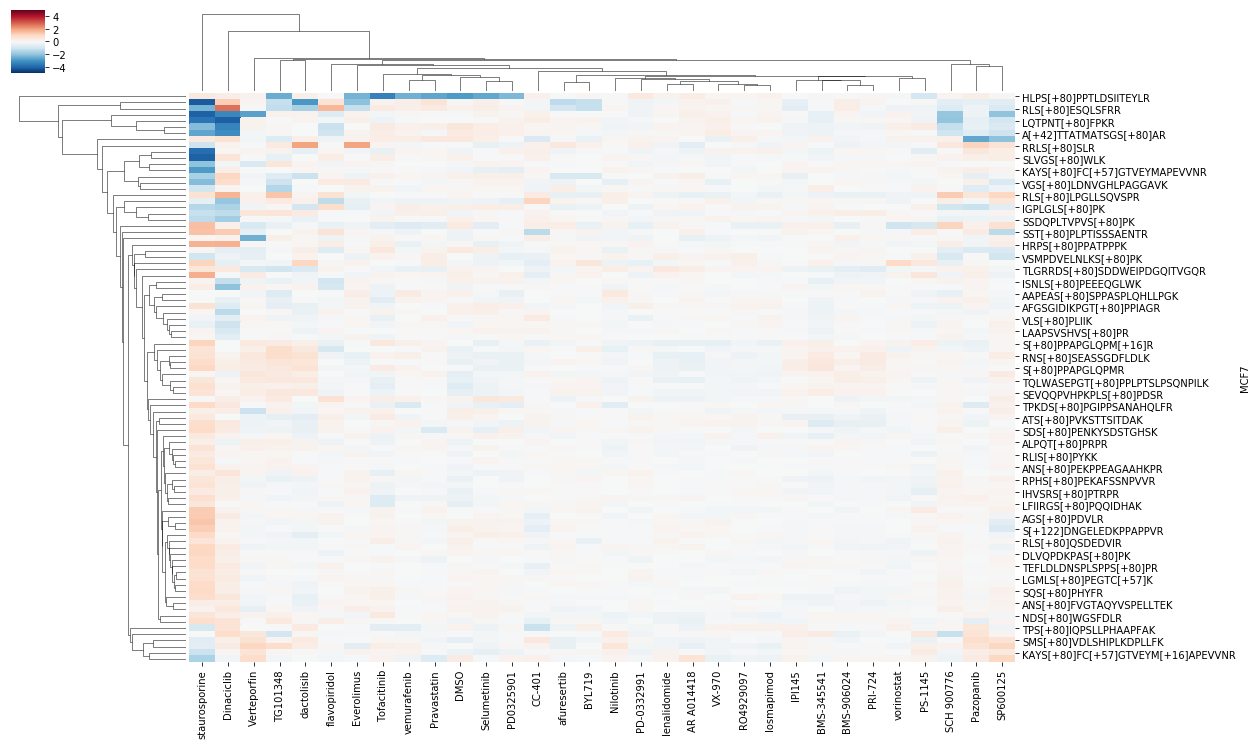

In [19]:
df_03 = df_03.interpolate()
sns.clustermap(df_03, cmap='RdBu_r',figsize = (18,12), vmin=-5, vmax=5);

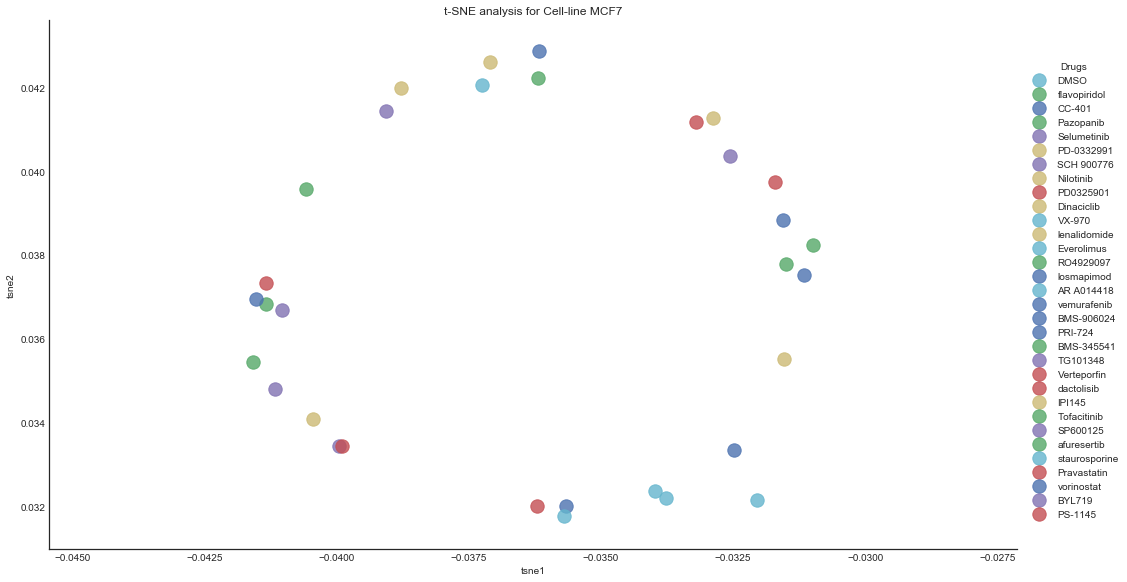

In [207]:
t_sne_drug = t_sneanalysis(df_03.T, dimension=2, per= 80)
df_t = pd.DataFrame(dict(tsne1=t_sne_drug[:,0], tsne2=t_sne_drug[:,1], Drugs=df_03.columns.values))

ax = sns.lmplot('tsne1', 'tsne2', hue='Drugs', data=df_t, size=8, palette=color_map, aspect=1.8, fit_reg=False, scatter_kws={"s": 180}, )
plt.title('t-SNE analysis for Cell-line MCF7');

# plt.scatter(t_sne_drug[:,0], t_sne_drug[:,1], s= 100);


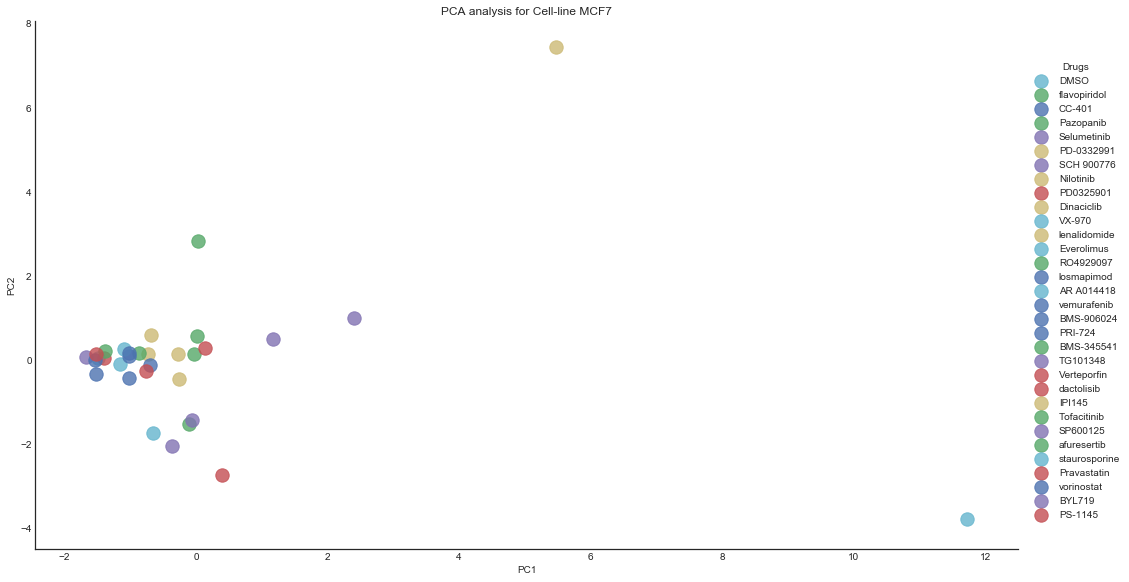

In [213]:
t_pca_drug = pca_analysis(df_03.T,2)
df_pca = pd.DataFrame(dict(PC1=t_pca_drug[:,0], PC2=t_pca_drug[:,1], Drugs=df_03.columns.values))
ax = sns.lmplot('PC1', 'PC2', hue='Drugs', data=df_pca, size=8, palette=color_map, aspect=1.8, fit_reg=False, scatter_kws={"s": 180}, )
plt.title('PCA analysis for Cell-line MCF7');

In [184]:
k_dm = dm.MultiOmics(datamatrix=df_03.T.values)
ln1, ln2 = k_dm.getepsilon(epsilonmax=10,epsilonmin=-10)
Eval, Evec = k_dm.diffusionmaps(alpha=1) 
idx = np.argsort(-Eval)
Eval = Eval[idx]
v = Evec[:,idx]

/home/krishna/Desktop/MultiomicsDM/LINCS data/Dmomics1.py:33: MatplotlibDeprecationWarning: numpy.arange
  lnepsrange              =   mlab.frange(epsilonmin, epsilonmax, dellneps)


In [185]:
# plt.plot(Eval[:40],"o");

# Diffusion Maps analysis on MCF7 cell line


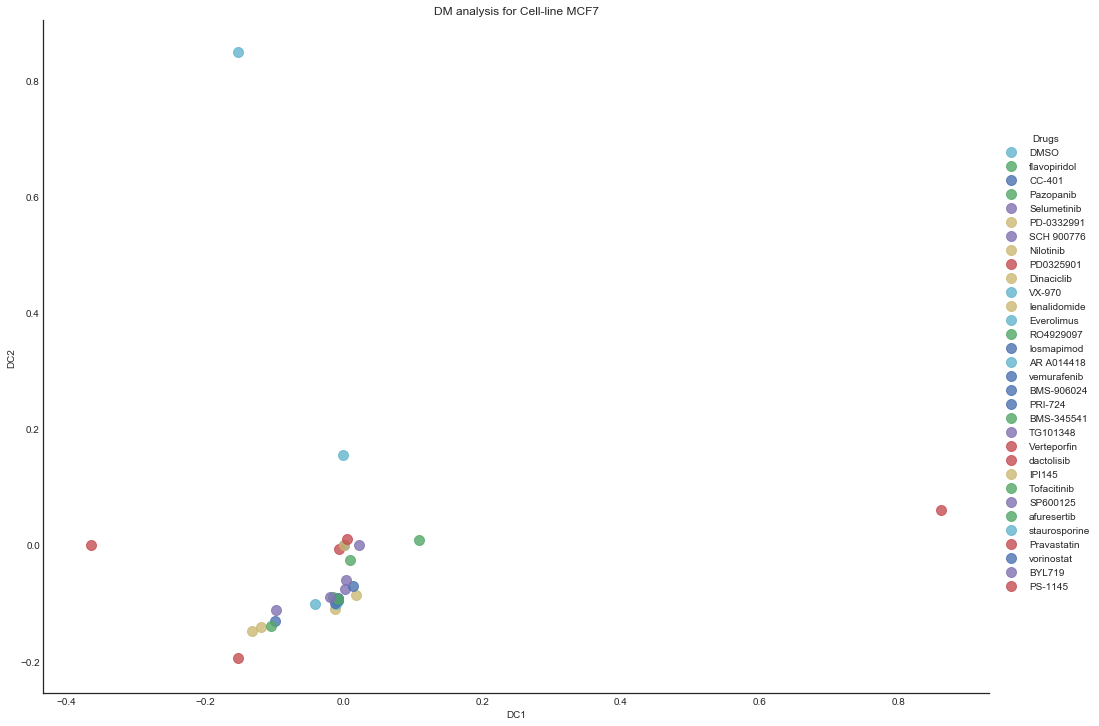

In [214]:
import matplotlib
from itertools import repeat
cell_id_order = []

# for f in gcp_keys:
#      if (lincs_gcp_drugs[f].shape[1]==32):
#             if  (f != 'LINCS_GCP_PlateZ'):
#                 cell_id_order.extend(repeat(cell_id[f], lincs_gcp_drugs[f].shape[0]))
#                 print f, lincs_gcp_drugs[f].shape[0], len(gcp_keys), len(cell_id_order)


sns.set_style("white")
color = df_03.columns.values

_colors = set(color)
rgb_values = sns.color_palette("deep",32);
color_map = dict(zip(_colors, rgb_values));

# print (len(color_map), len(color), _colors)

# Map label to RGB
color_map = dict(zip(_colors, rgb_values));

# plt.rcParams['figure.figsize'] = [14, 10]
colo = np.arange(len(v[0]))
# ax = plt.scatter(v[0], v[1], s =80, 
#                  c= [color_map[i] for i in df_03.columns.values],  cmap=matplotlib.colors.ListedColormap(_colors)) 

df = pd.DataFrame(dict(DC1=Eval[2]*v[2], DC2=Eval[1]*v[1], Drugs=df_03.columns.values))
# plt.rcParams['figure.figsize'] = [14, 10]
ax = sns.lmplot('DC1', 'DC2', hue='Drugs', data=df, size=10, palette=color_map, aspect=1.4, fit_reg=False, scatter_kws={"s": 100})
plt.title('DM analysis for Cell-line MCF7');
# fig = ax.fig
# fig.suptitle('GCP Connectivity', fontsize=30)

# import itertools
# import matplotlib.pyplot as plt

# colormap = plt.cm.Dark2.colors   # Qualitative colormap
# for i,(marker,color) in zip(range(N),itertools.product(m_styles, colormap)):
#     plt.scatter(*np.random.random(2), color=color,marker=marker,label=i)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,ncol=4);

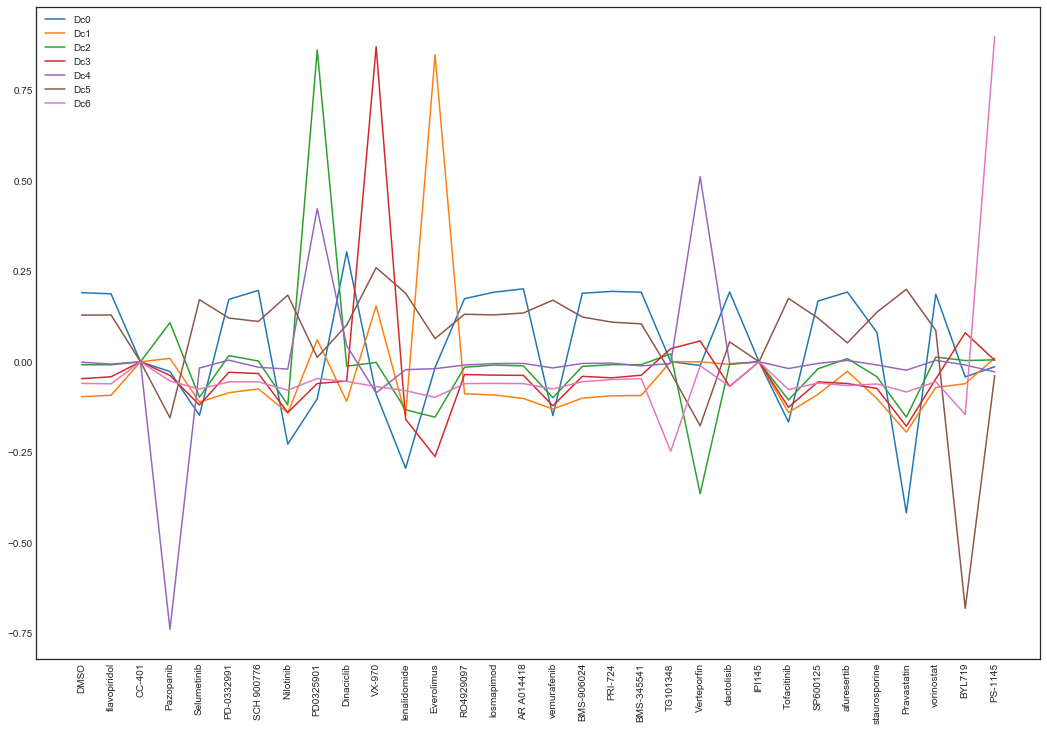

In [202]:
plt.rcParams['figure.figsize'] = [18, 12]
plt.plot(v[0], label= 'Dc0')
plt.plot(v[1], label= 'Dc1')
plt.plot(v[2], label= 'Dc2')
plt.plot(v[3], label= 'Dc3')
plt.plot(v[4], label= 'Dc4')
plt.plot(v[5], label= 'Dc5')
plt.plot(v[6], label= 'Dc6')


plt.legend()
plt.xticks(np.arange(32), df_03.columns.values,  rotation=90); 

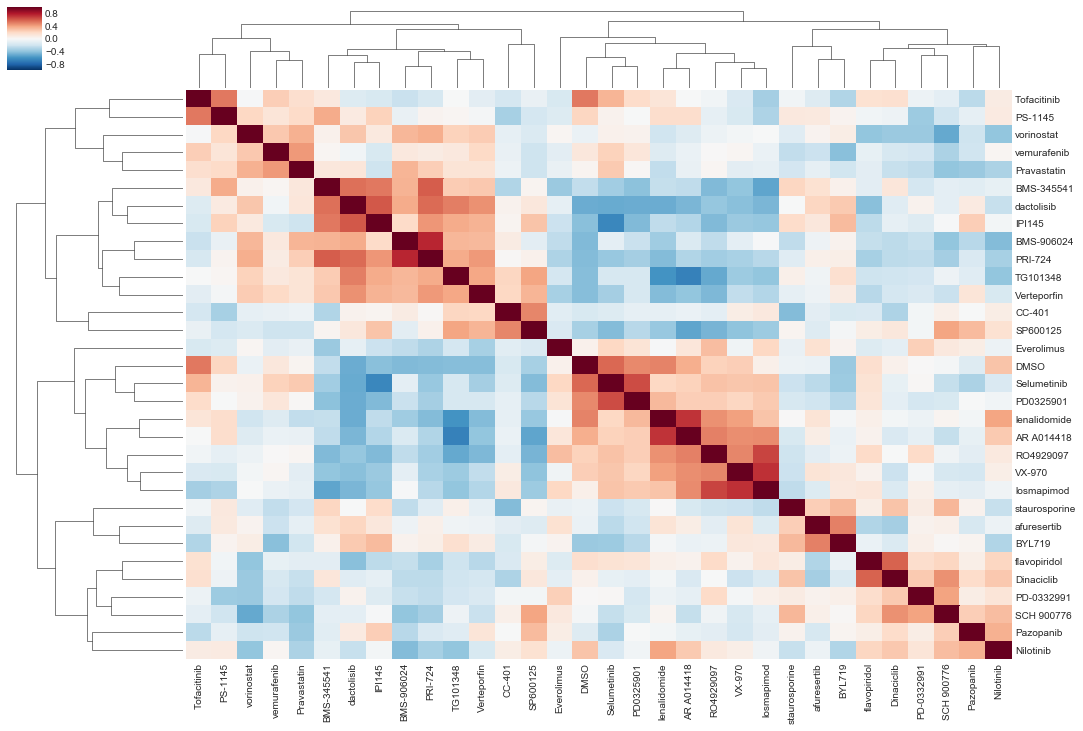

In [191]:
sns.clustermap(df_03.corr(method =  'spearman'), cmap='RdBu_r',figsize = (18,12), vmin=-1, vmax=1);

# Integrated analysis for kinase drug

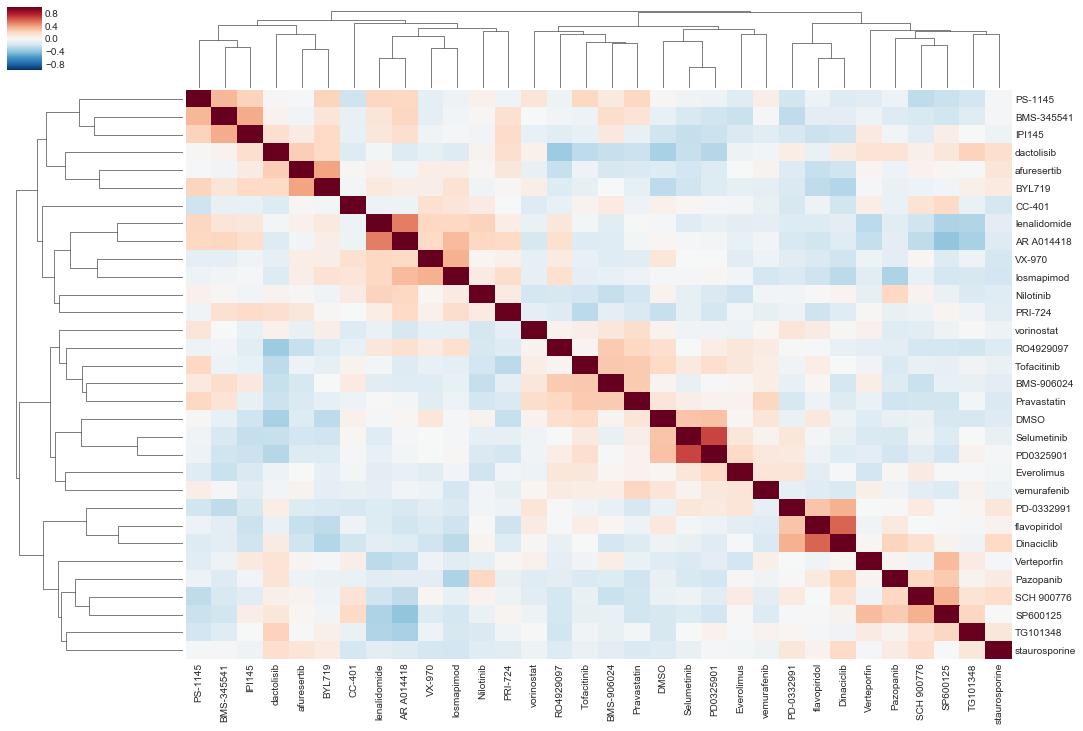

In [188]:
sns.clustermap(integrated_kinase.corr(method =  'spearman'), cmap='RdBu_r',figsize = (18,12), vmin=-1, vmax=1);

In [189]:
int_dm = dm.MultiOmics(datamatrix=integrated_kinase.T.values)
ln1, ln2 = int_dm.getepsilon(epsilonmax=10,epsilonmin=-10)
Eval_, Evec_ = int_dm.diffusionmaps(alpha=1) 
idx_ = np.argsort(-Eval_)
Eval_ = Eval_[idx_]
v_ = Evec_[:,idx]

/home/krishna/Desktop/MultiomicsDM/LINCS data/Dmomics1.py:33: MatplotlibDeprecationWarning: numpy.arange
  lnepsrange              =   mlab.frange(epsilonmin, epsilonmax, dellneps)


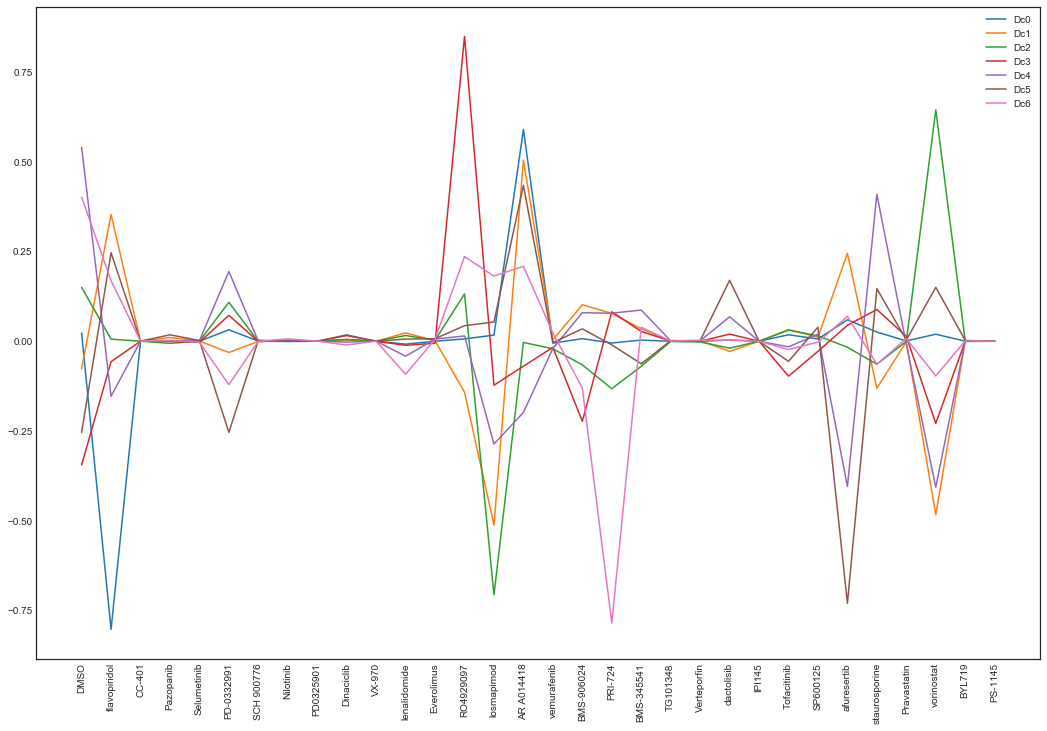

In [190]:
plt.rcParams['figure.figsize'] = [18, 12]
plt.plot(v_[0], label= 'Dc0')
plt.plot(v_[1], label= 'Dc1')
plt.plot(v_[2], label= 'Dc2')
plt.plot(v_[3], label= 'Dc3')
plt.plot(v_[4], label= 'Dc4')
plt.plot(v_[5], label= 'Dc5')
plt.plot(v_[6], label= 'Dc6')
plt.legend()
plt.xticks(np.arange(32), integrated_kinase.columns.values,  rotation=90); 

# t-SNE analysis on integrated data

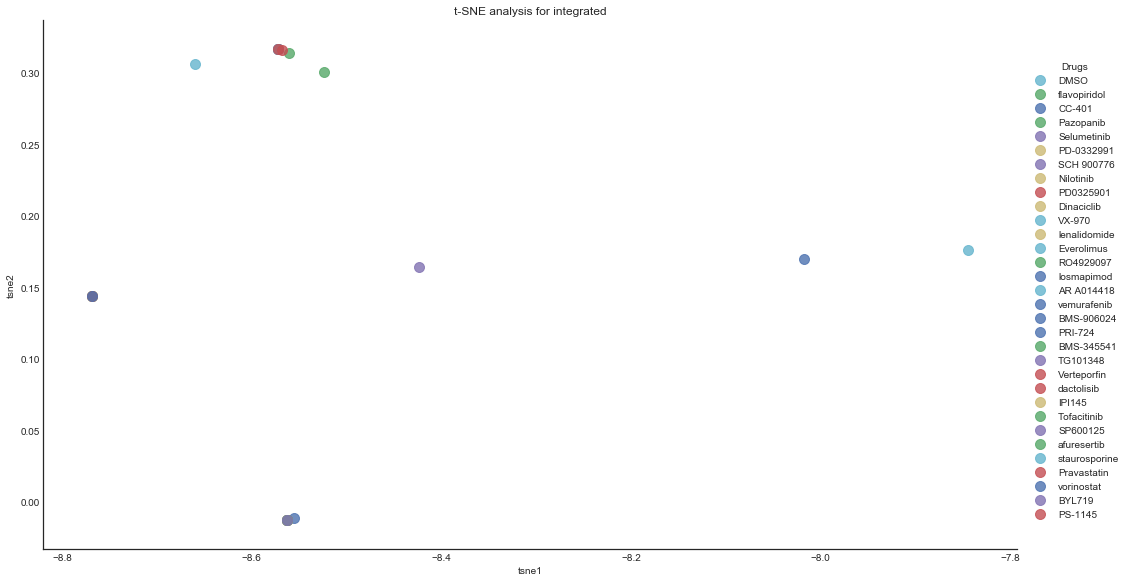

In [223]:
t_sne_drug = t_sneanalysis(integrated_kinase.T, dimension=2, per= 80)
df_t = pd.DataFrame(dict(tsne1=t_sne_drug[:,0], tsne2=t_sne_drug[:,1], Drugs=integrated_kinase.columns.values))
color = integrated_kinase.columns.values
_colors = set(color)
rgb_values = sns.color_palette("deep",len(integrated_kinase));
color_map = dict(zip(_colors, rgb_values));
ax = sns.lmplot('tsne1', 'tsne2', hue='Drugs', data=df_t, size=8, palette=color_map, aspect=1.8, fit_reg=False, scatter_kws={"s": 100}, )
plt.title('t-SNE analysis for integrated');

# PCA analysis on integrated data

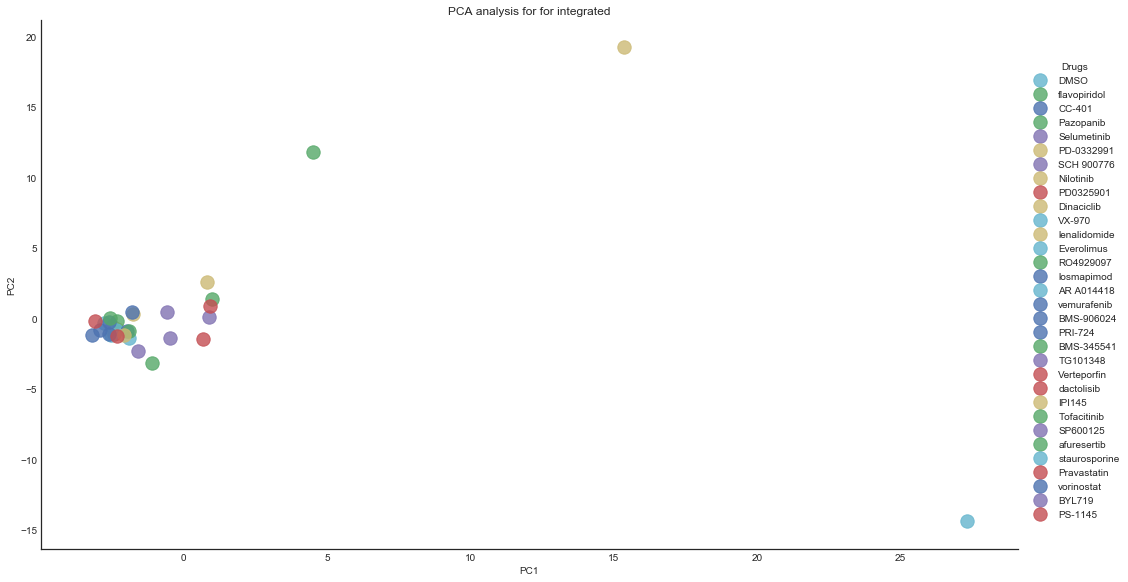

In [226]:
t_pca_drug = pca_analysis(integrated_kinase.T,2)
df_pca = pd.DataFrame(dict(PC1=t_pca_drug[:,0], PC2=t_pca_drug[:,1], Drugs=integrated_kinase.columns.values))
ax = sns.lmplot('PC1', 'PC2', hue='Drugs', data=df_pca, size=8, palette=color_map, aspect=1.8, fit_reg=False, scatter_kws={"s": 180}, )
plt.title('PCA analysis for for integrated');

In [224]:
# df_24 = working_lincs_p100['LINCS_P100_PRM_Plate29_24H'].set_index('MCF7')
# df_24 = df_24.interpolate()
# sns.clustermap(df_24, cmap='RdBu_r',figsize = (18,12), vmin=-5, vmax=5);

In [15]:
df_24.columns

Index(['DMSO', 'flavopiridol', 'CC-401', 'Pazopanib', 'Selumetinib',
       'PD-0332991', 'SCH 900776', 'Nilotinib', 'PD0325901', 'Dinaciclib',
       'VX-970', 'lenalidomide', 'Everolimus', 'RO4929097', 'losmapimod',
       'AR A014418', 'vemurafenib', 'BMS-906024', 'PRI-724', 'BMS-345541',
       'TG101348', 'Verteporfin', 'dactolisib', 'IPI145', 'Tofacitinib',
       'SP600125', 'afuresertib', 'staurosporine', 'Pravastatin', 'vorinostat',
       'BYL719', 'PS-1145'],
      dtype='object')

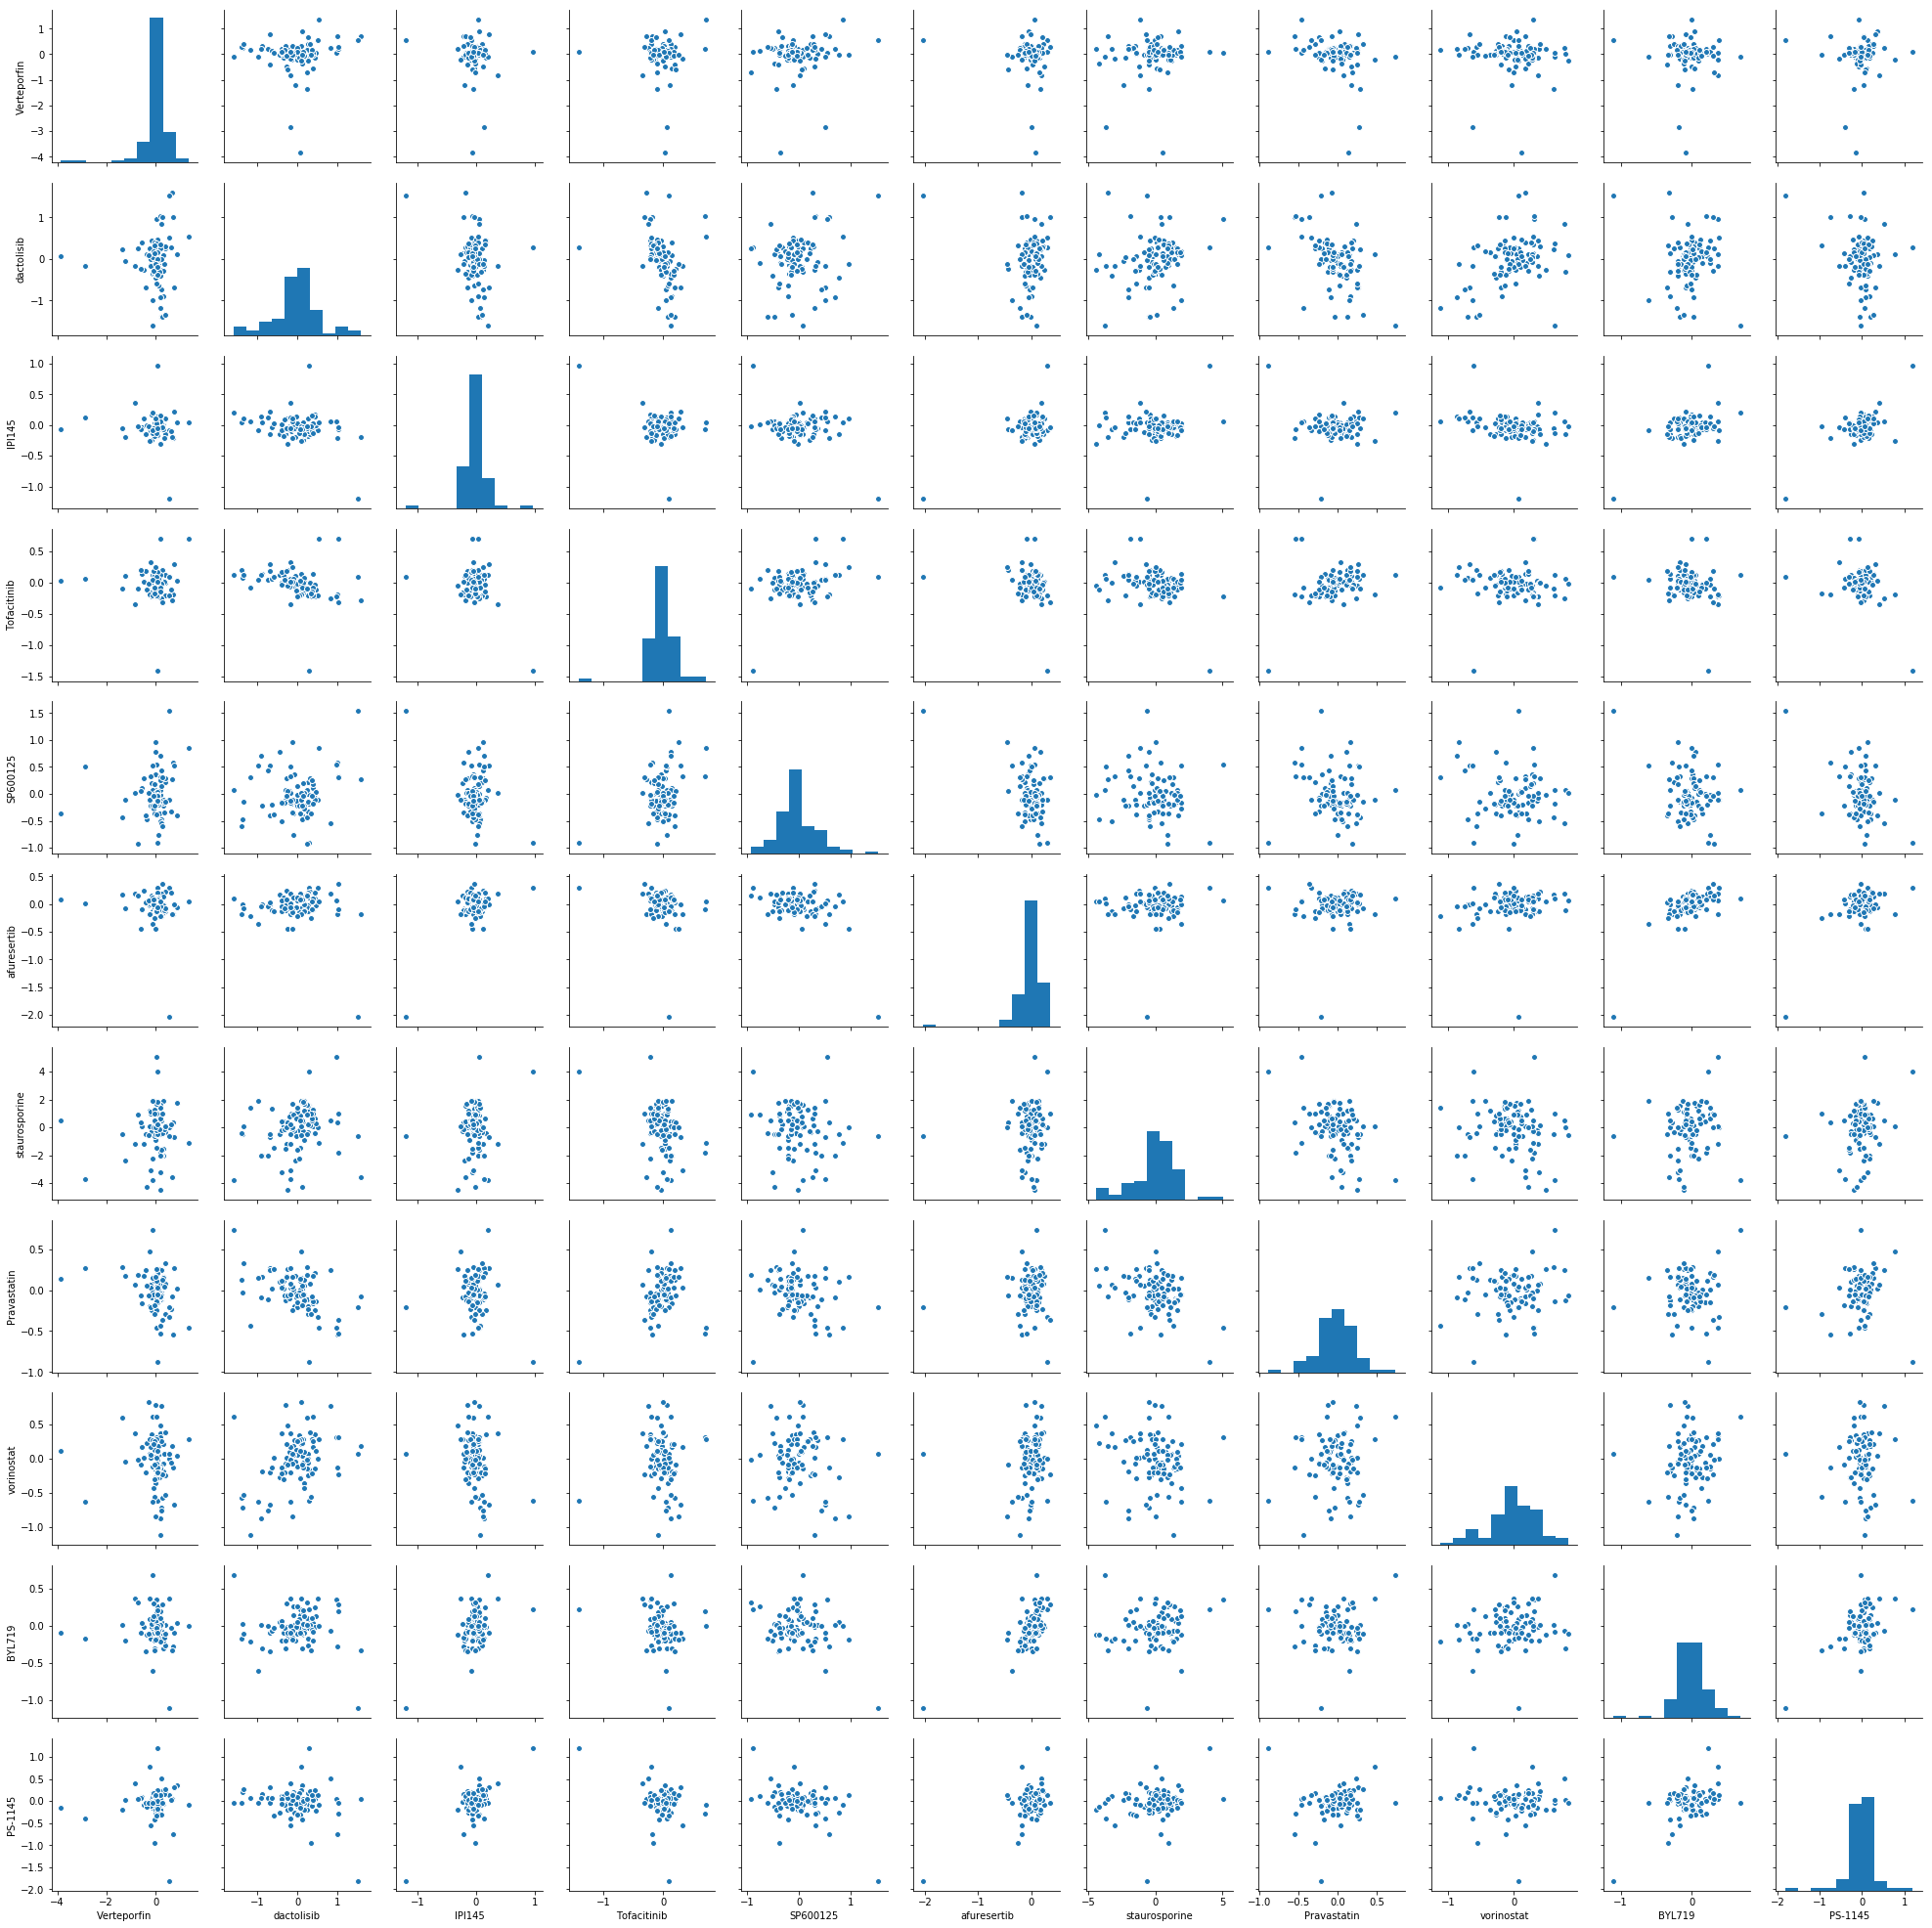

In [33]:
sns.pairplot(df_24[['Verteporfin', 'dactolisib', 'IPI145', 'Tofacitinib',
       'SP600125', 'afuresertib', 'staurosporine', 'Pravastatin', 'vorinostat',
       'BYL719', 'PS-1145']])

In [38]:
import Dmomics1 as dm

In [58]:
kinase_dm = dm.MultiOmics(datamatrix=df_24.values)
ln1, ln2 = kinase_dm.getepsilon(epsilonmax=10,epsilonmin=-10)
Eval, Evec = kinase_dm.diffusionmaps(alpha=0.5) 

/home/krishna/Desktop/MultiomicsDM/LINCS data/Dmomics1.py:33: MatplotlibDeprecationWarning: numpy.arange
  lnepsrange              =   mlab.frange(epsilonmin, epsilonmax, dellneps)


In [59]:
idx = np.argsort(-Eval)
Eval = Eval[idx]
v = Evec[:,idx]

In [82]:
kinase_dm.epsilon =5

In [83]:
Eval, Evec = kinase_dm.diffusionmaps(alpha=0.5) 

In [89]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [94]:
gp = GaussianProcessRegressor()
gp.fit(np.array([df_24['DMSO'].values]),np.array([df_24['Verteporfin'].values]))

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [99]:
pred =  gp.predict(np.array([df_24['DMSO'].values]));

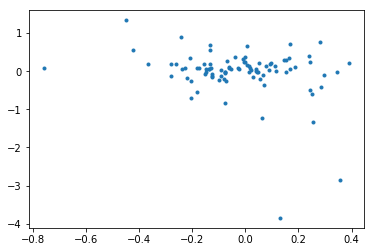

In [105]:
plt.plot(df_24['DMSO'].values,pred[0], ".")

### Drugs that causes most changes in the gene expression levels in MCF7 cell lines are:
- **staurosporine** : Staurosporine is a potent, non-selective inhibitor of protein kinases, including protein kinase C. This agent induces apoptosis by an undetermined mechanism. (pubchem) 
- **flavopiridol** : As an inhibitor of cyclin-dependent kinase, alvocidib induces cell cycle arrest by preventing phosphorylation of cyclin-dependent kinases (CDKs) and by down-regulating cyclin D1 and D3 expression.  
- **Dinaciclib** : Dinaciclib selectively inhibits cyclin dependent kinases CDK1, CDK2, CDK5, and CDK9; 


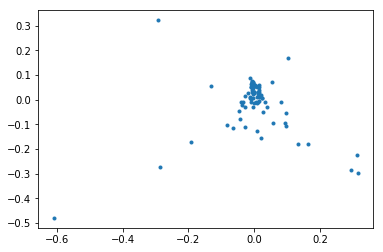

In [88]:
plt.plot(Evec[8], Evec[7], ".");

# Downregulation genes for staurosporine

In [191]:
# print (gene_id)
for i in downregulations(df_24,'staurosporine' ):
    print (i, gene_id[i])




VGS[+80]LDNVGHLPAGGAVK MAP4
TFS[+80]LTEVR KIF4A
SLVGS[+80]WLK C22orf9
HAS[+80]PILPITEFSDIPR TMPO
RRLS[+80]SLR RPS6
KAYS[+80]FC[+57]GTVEYMAPEVVNR RPS6KA1


# These set of gene mainly involved in the M-Phase of cell cycle (using reactome)

In [192]:
for i in upregulations(df_24,'staurosporine' ):
    print (i, gene_id[i])

IYQY[+80]IQSR DYRK1A
TPKDS[+80]PGIPPSANAHQLFR RPS6KA3
RNS[+80]SEASSGDFLDLK HN1
LPLVPES[+80]PRR ZC3HC1
ANAS[+80]PQKPLDLK NCOR2
SMS[+80]VDLSHIPLKDPLLFK KIAA0701
LENS[+80]PLGEALR OCIAD1
ANS[+80]FVGTAQYVSPELLTEK PDPK1
TNPPTQKPPS[+80]PPMSGR ABI1
SNS[+80]LPHSAVSNAGSK WDR20
S[+80]PTGPSNSFLANMGGTVAHK RBM17
S[+80]LTAHSLLPLAEK IQGAP3
AAPEAS[+80]SPPASPLQHLLPGK FAM129B
S[+122]DKPDM[+16]AEIEKFDK TMSB4X
S[+122]DKPDMAEIEKFDK TMSB4X
SLS[+80]LGDKEISR AP1GBP1
DLVQPDKPAS[+80]PK ZC3H14
S[+80]FAGNLNTYKR PFKP
SPS[+80]PAHLPDDPKVAEK LARP5
RLIS[+80]PYKK HAT1
S[+80]IQDLTVTGTEPGQVSSR MAP3K7
HRPS[+80]PPATPPPK SRRM1
IHS[+80]PIIR BRD4
LHS[+80]APNLSDLHVVRPK ULK1
LLEDS[+80]EESSEETVSR DHX16
TLGRRDS[+80]SDDWEIPDGQITVGQR BRAF
S[+80]PPAPGLQPM[+16]R FOSL2
S[+80]PPAPGLQPMR FOSL2
LAS[+80]PELER JUND
IGPLGLS[+80]PK RPL12
TPS[+80]IQPSLLPHAAPFAK NUP214
A[+42]TTATM[+16]ATSGS[+80]AR EIF4A3
A[+42]TTATMATSGS[+80]AR EIF4A3
LIPGPLS[+80]PVAR BAT2
LGM[+16]LS[+80]PEGTC[+57]K FASN
LGMLS[+80]PEGTC[+57]K FASN
ISNLS[+80]PEEEQGLWK FAM76B
VSM

# It will be easy to find variation using covariance analysis and PCA

# Co-variance analysis

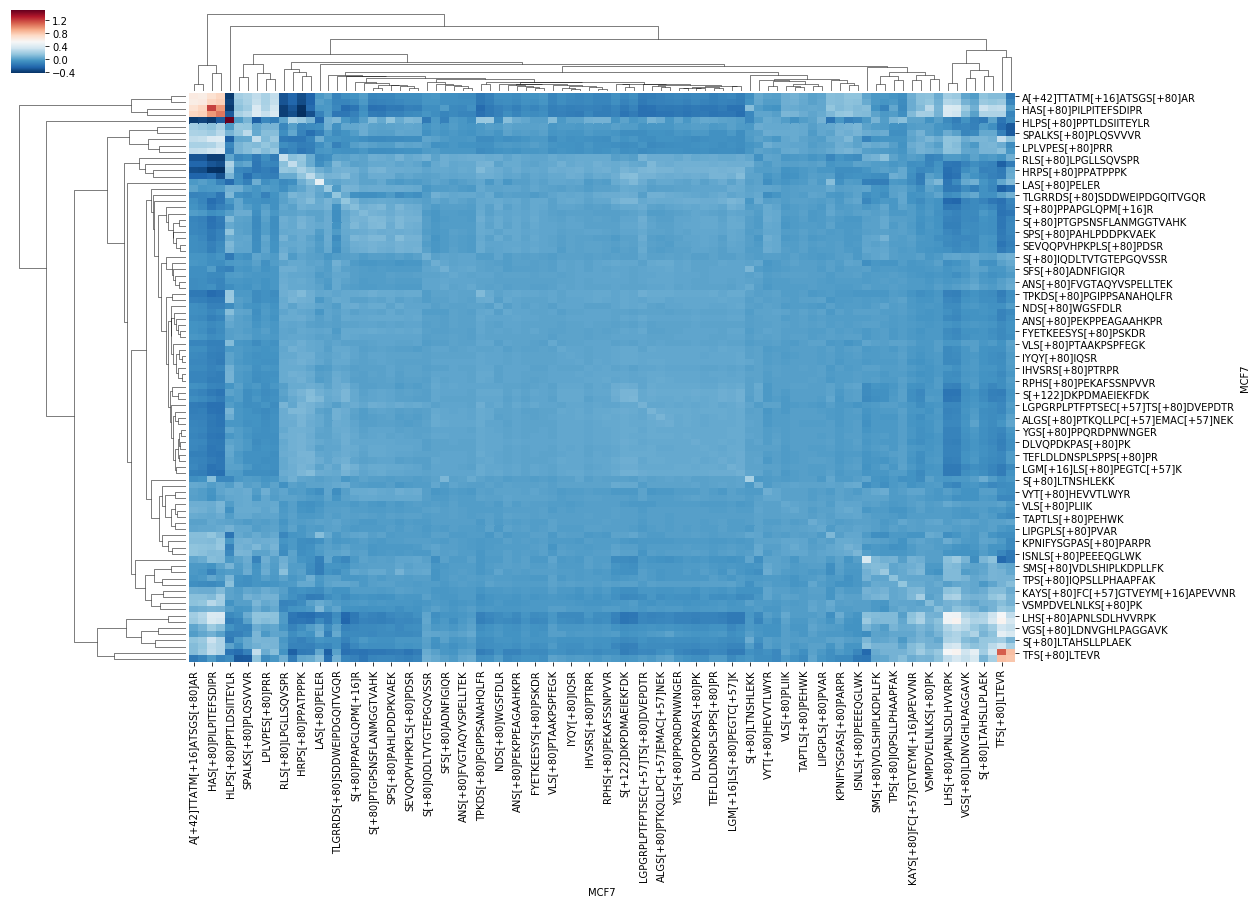

In [21]:
sns.clustermap(df_03.T.cov(), cmap='RdBu_r', figsize = (18,12));

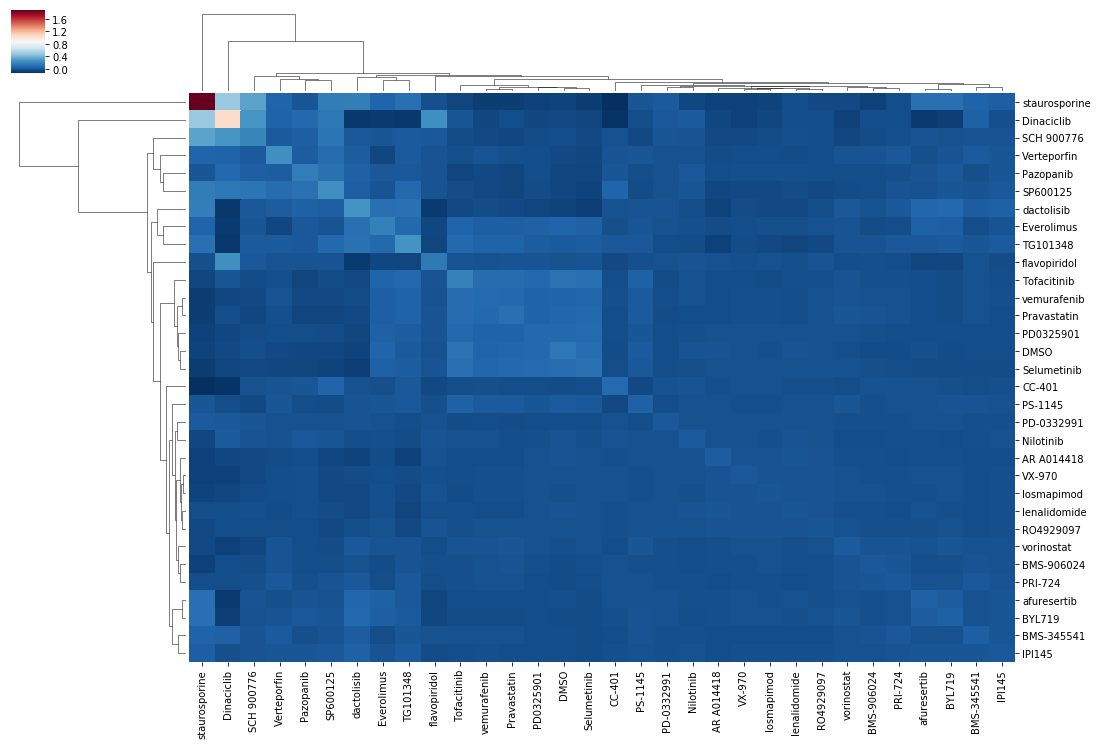

In [22]:
sns.clustermap(df_03.cov(), cmap='RdBu_r', figsize = (18,12));

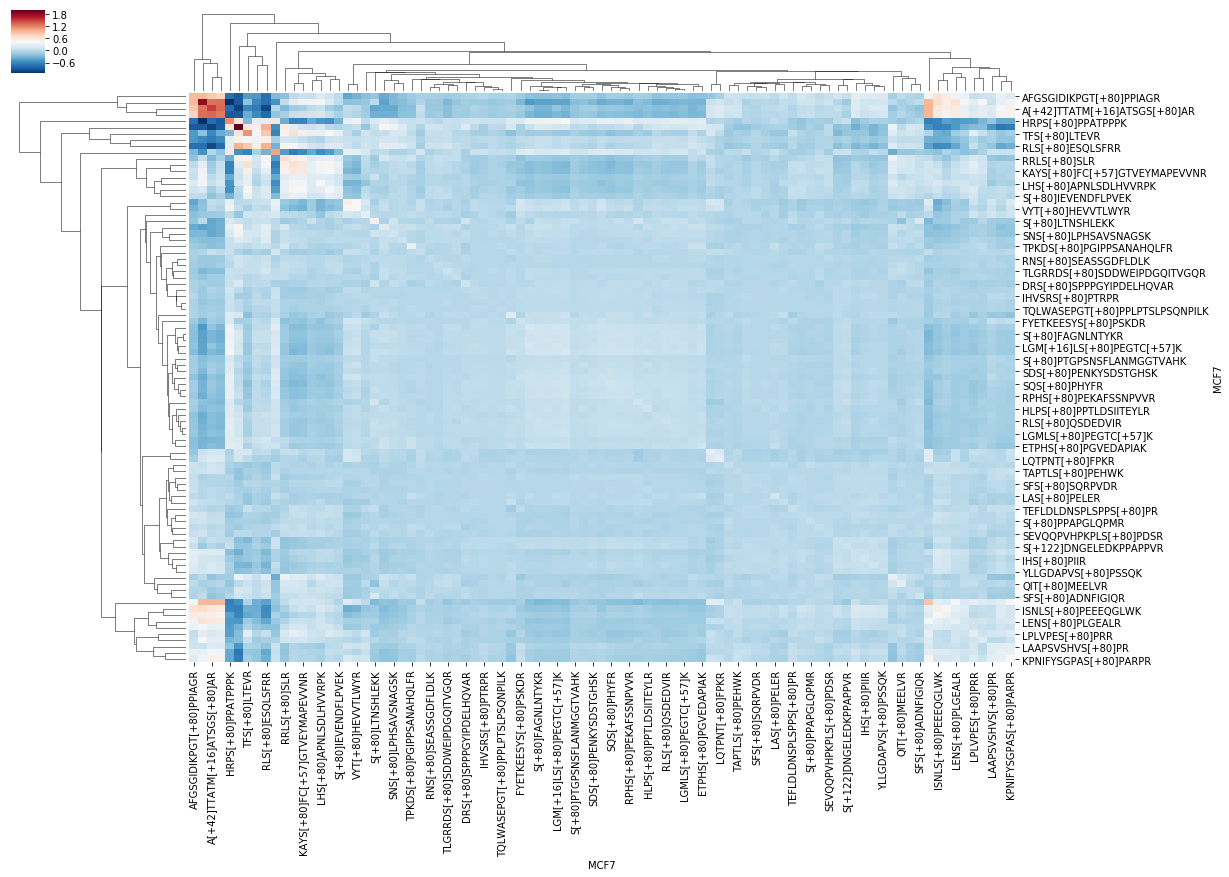

In [190]:
sns.clustermap(df_24.T.cov(), cmap='RdBu_r', figsize = (18,12));

# Correlation analysis:

Check if matrix is positive semi-definite 

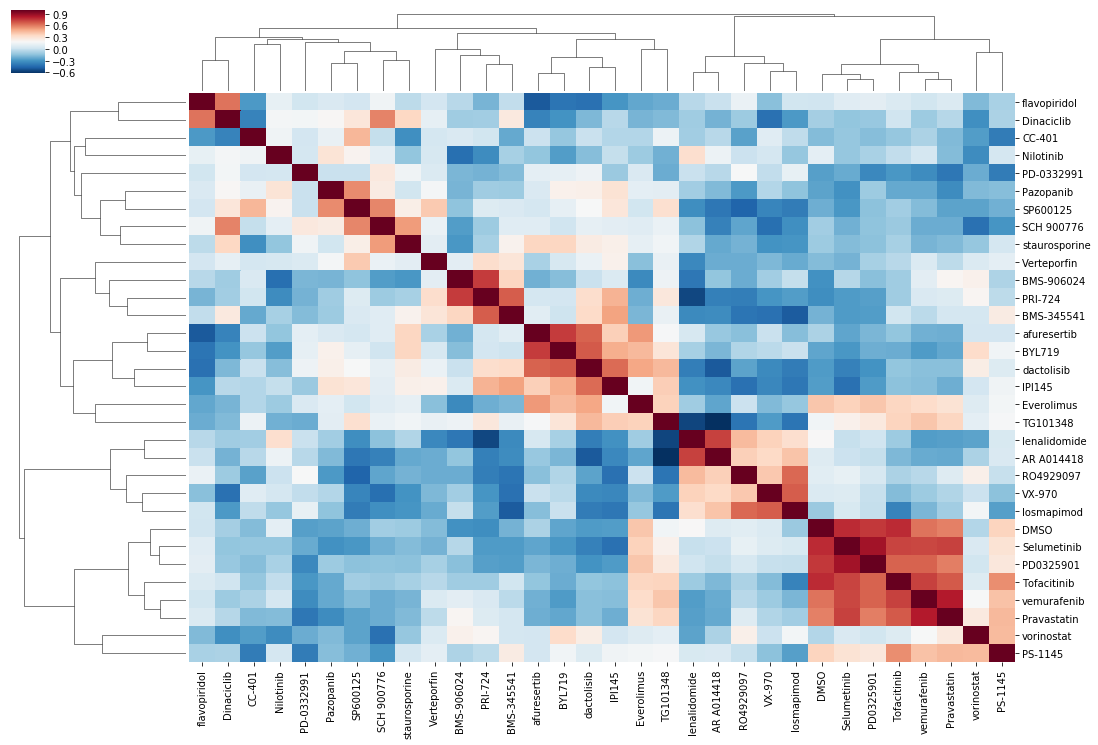

In [23]:
sns.clustermap((df_03.corr()), cmap='RdBu_r', figsize = (18,12));

In [24]:
from numpy import linalg as LA
w, v = LA.eig(df_03.corr().values)

In [30]:
np.dot(v[:,0],v[:,1])

4.163336342344337e-16

## There are at-least 4-5 clusters
## it is interesting effect of some drugs are correlated that is almost not noticed by the PCA. 
## Find mutual information and see if there is any additional information
- Pearson's coefficient and Spearman's rank order coefficient, 

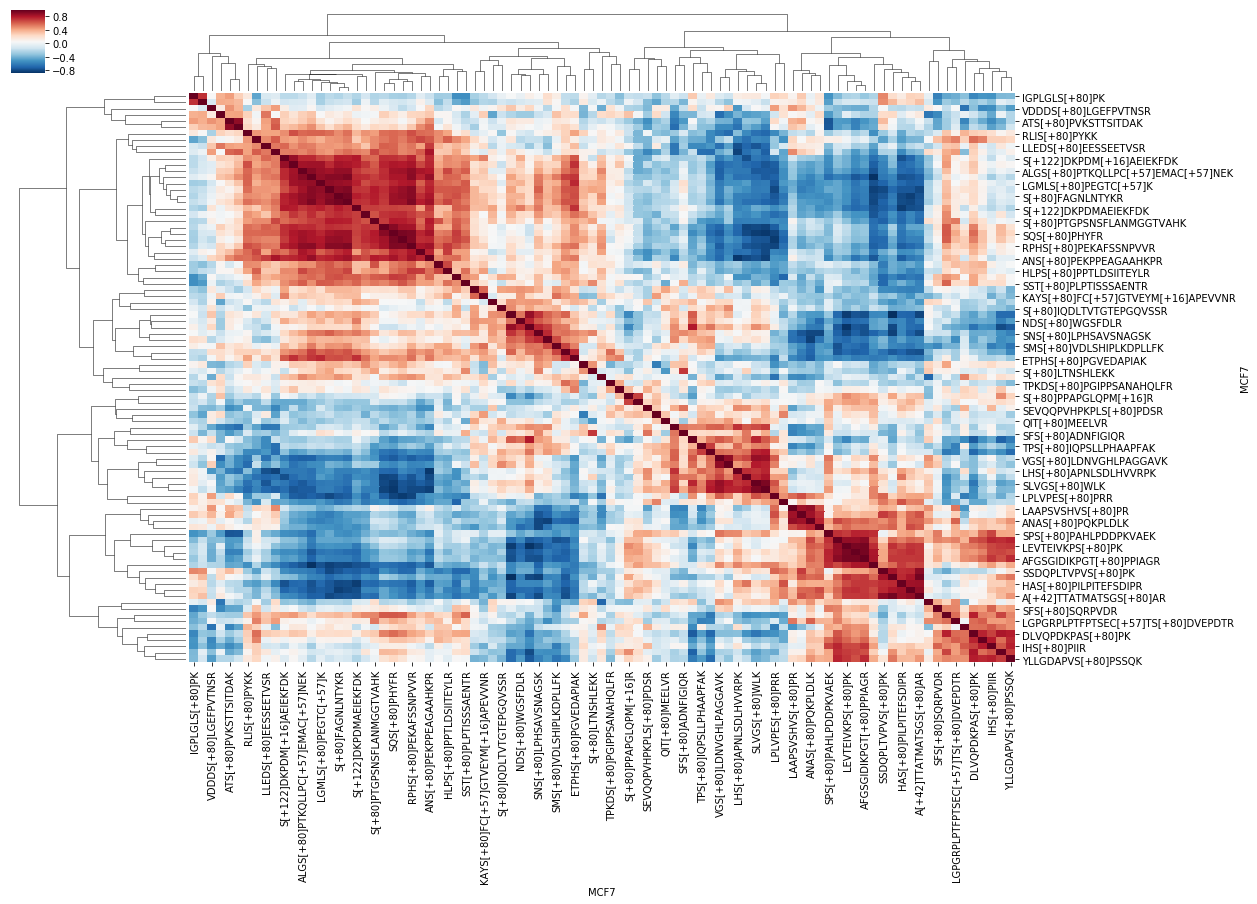

In [186]:
sns.clustermap((df_24.T.corr()), cmap='RdBu_r', figsize = (18,12));


In [ ]:
for i in df_24.columns:
    print (i, len(downregulations(df_24,i)), len((upregulations(df_24,i))))

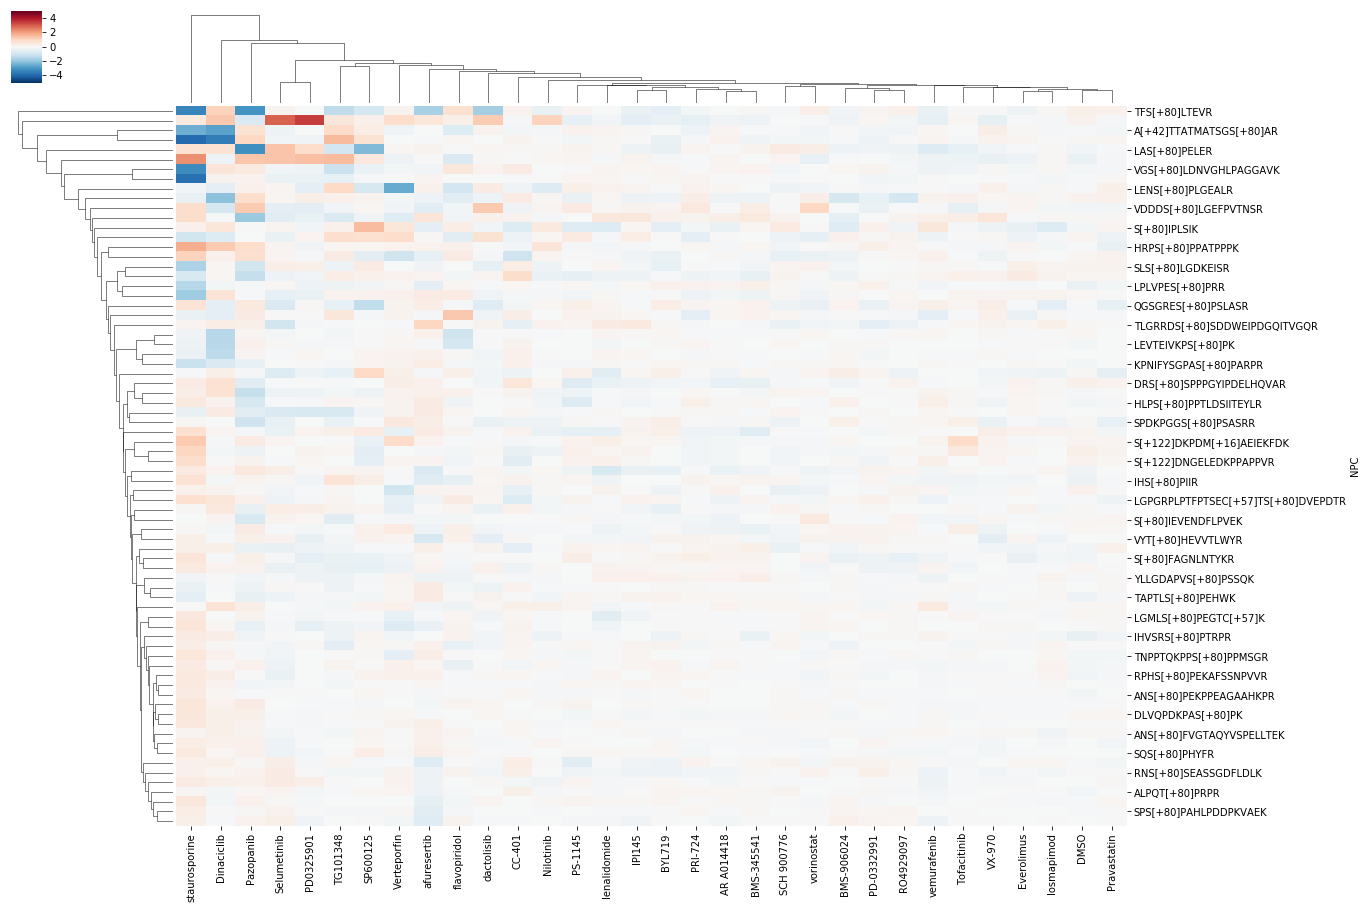

In [34]:
df_NPC = working_lincs_p100['LINCS_P100_DIA_Plate27'].set_index('NPC')
df_NPC = df_NPC.interpolate()
sns.clustermap(df_NPC, cmap='RdBu_r', figsize = (20,15), vmin=-5, vmax=5);

Drug *staurosporine* has most influence 
- KIF4A 

# **big assumption need to discuss**


In [108]:
# **big assumption need to discuss**

def downregulations(dataframe, col_name):
    """ Assumption: data has normal distribution
    Z-score< -1.96 can be considered as down-regulation"""
    return dataframe.index[stats.zscore(dataframe[col_name].values) < -1.96].values
def upregulations(dataframe, col_name):
    """ Assumption: data has normal distribution
    Z-score > -1.96 can be considered as down-regulation"""
    return dataframe.index[stats.zscore(dataframe[col_name].values) > -1.96].values

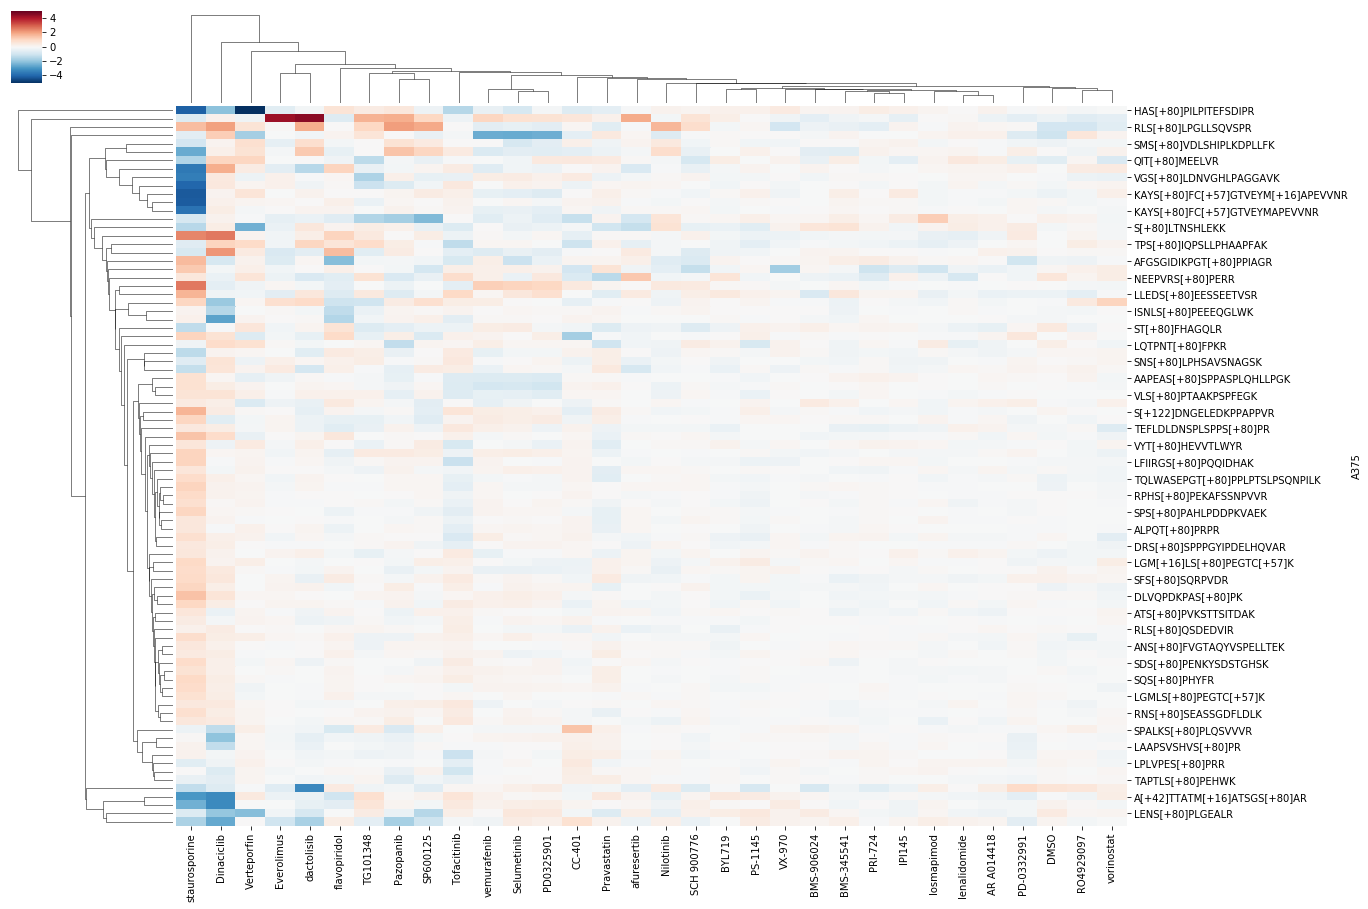

In [133]:
df_A375 = working_lincs_p100['LINCS_P100_PRM_Plate28'].set_index('A375')
df_A375 = df_A375.interpolate()
sns.clustermap(df_A375, cmap='RdBu_r', figsize = (20,15), vmin=-5, vmax=5);

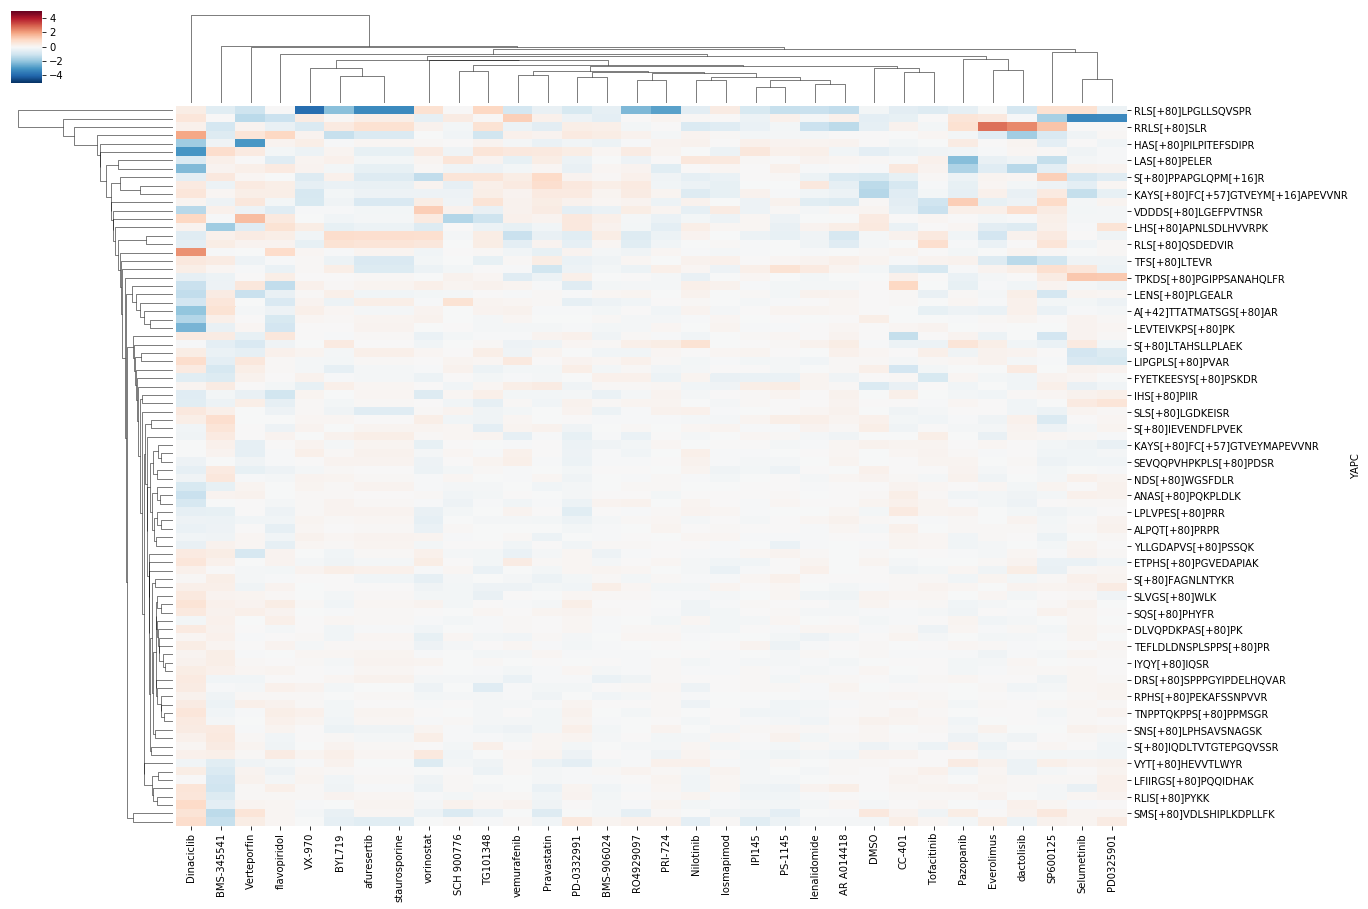

In [135]:
df_YAPC = working_lincs_p100['LINCS_P100_PRM_Plate32'].set_index('YAPC')
df_YAPC = df_YAPC.interpolate()
sns.clustermap(df_YAPC, cmap='RdBu_r', figsize = (20,15), vmin=-5, vmax=5);

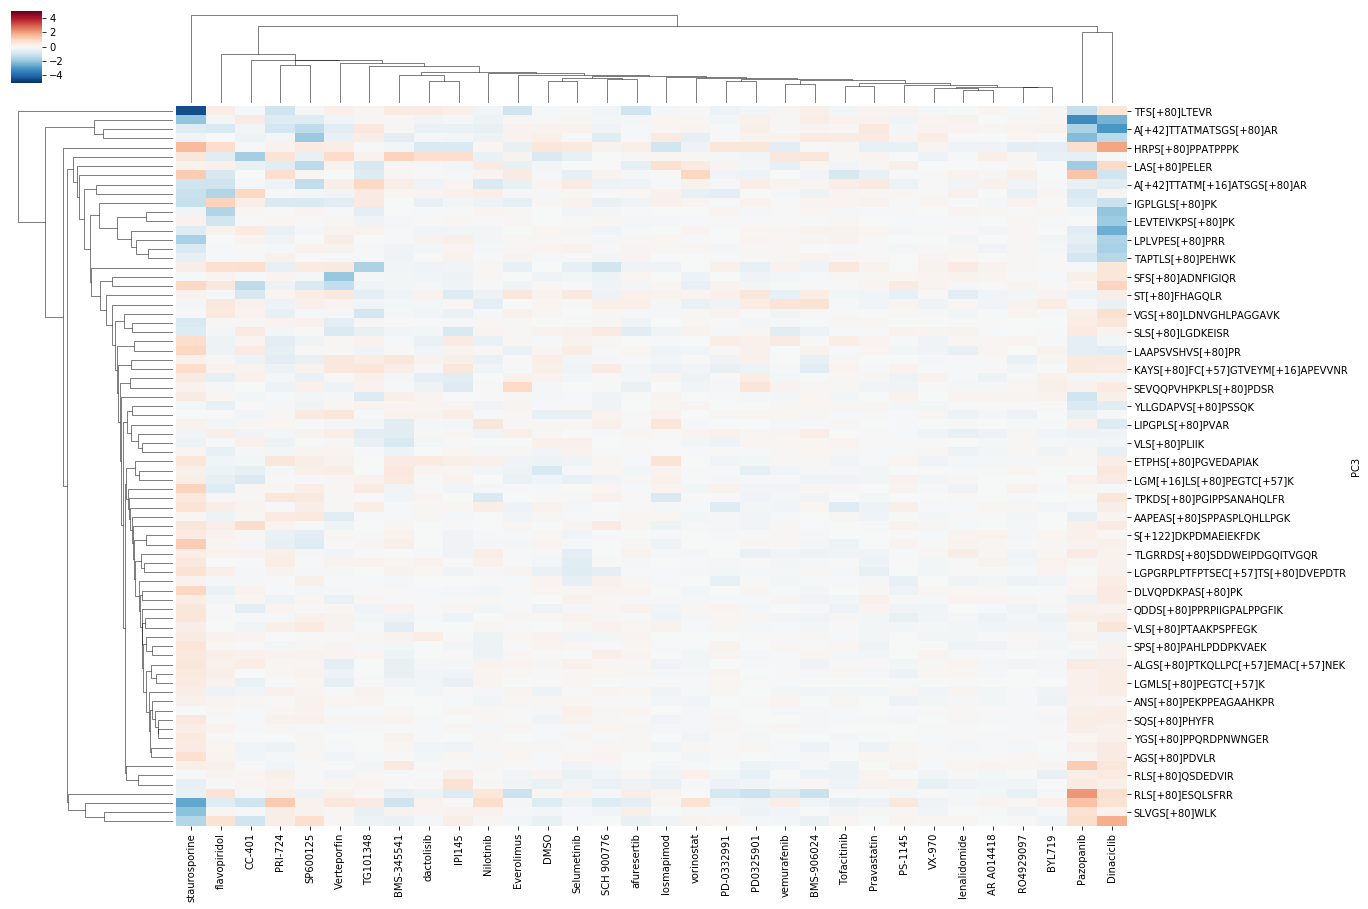

In [18]:

df_PC3 = working_lincs_p100['LINCS_P100_DIA_Plate34'].set_index('PC3')
df_PC3 = df_PC3.interpolate()
sns.clustermap(df_PC3, cmap='RdBu_r', figsize = (20,15), vmin=-5, vmax=5);

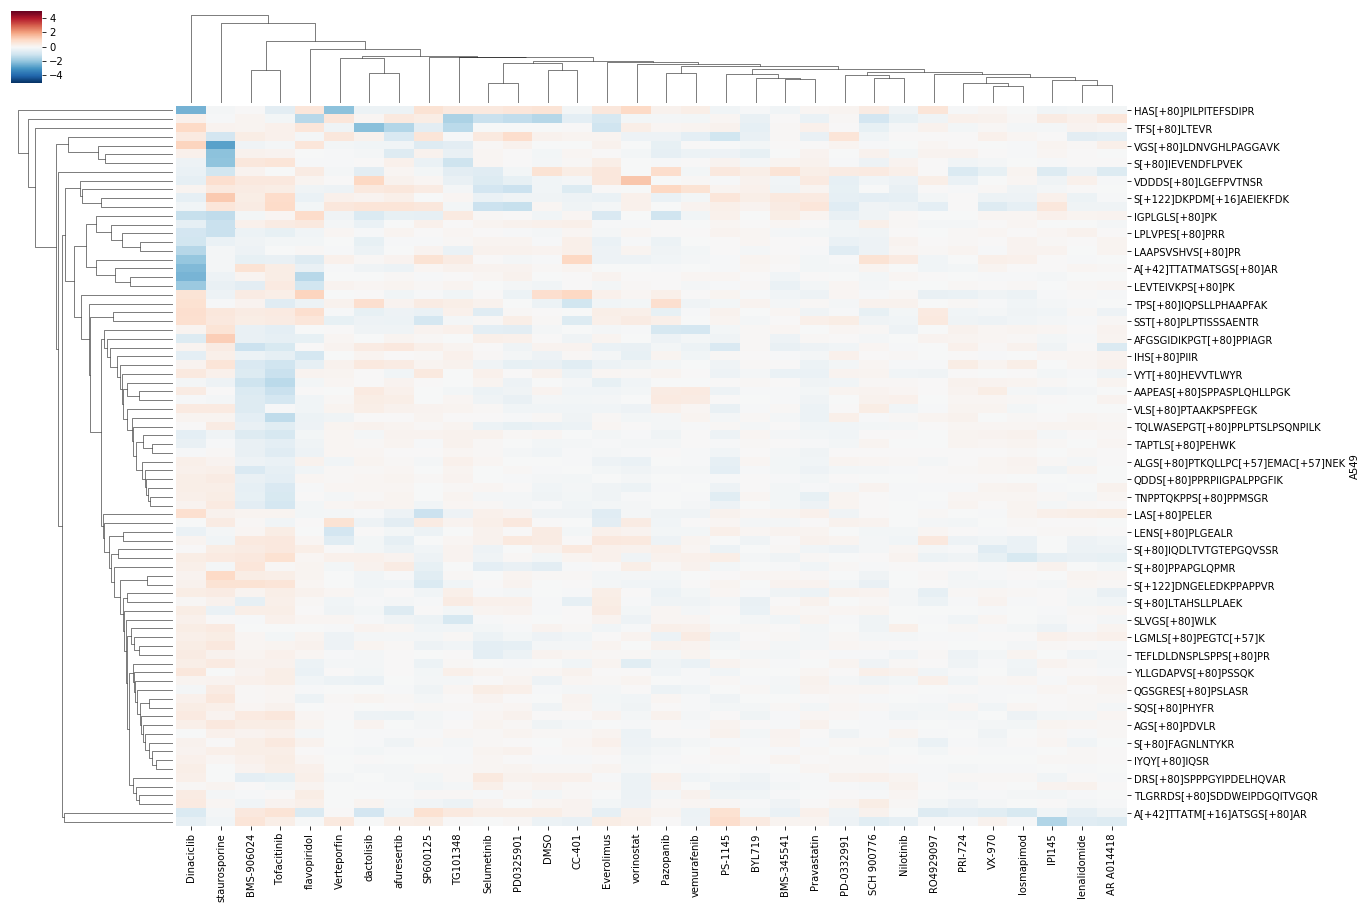

In [19]:

df_A549 = working_lincs_p100['LINCS_P100_DIA_Plate33'].set_index('A549')
df_A549 = df_A549.interpolate()
sns.clustermap(df_A549, cmap='RdBu_r', figsize = (20,15), vmin=-5, vmax=5);

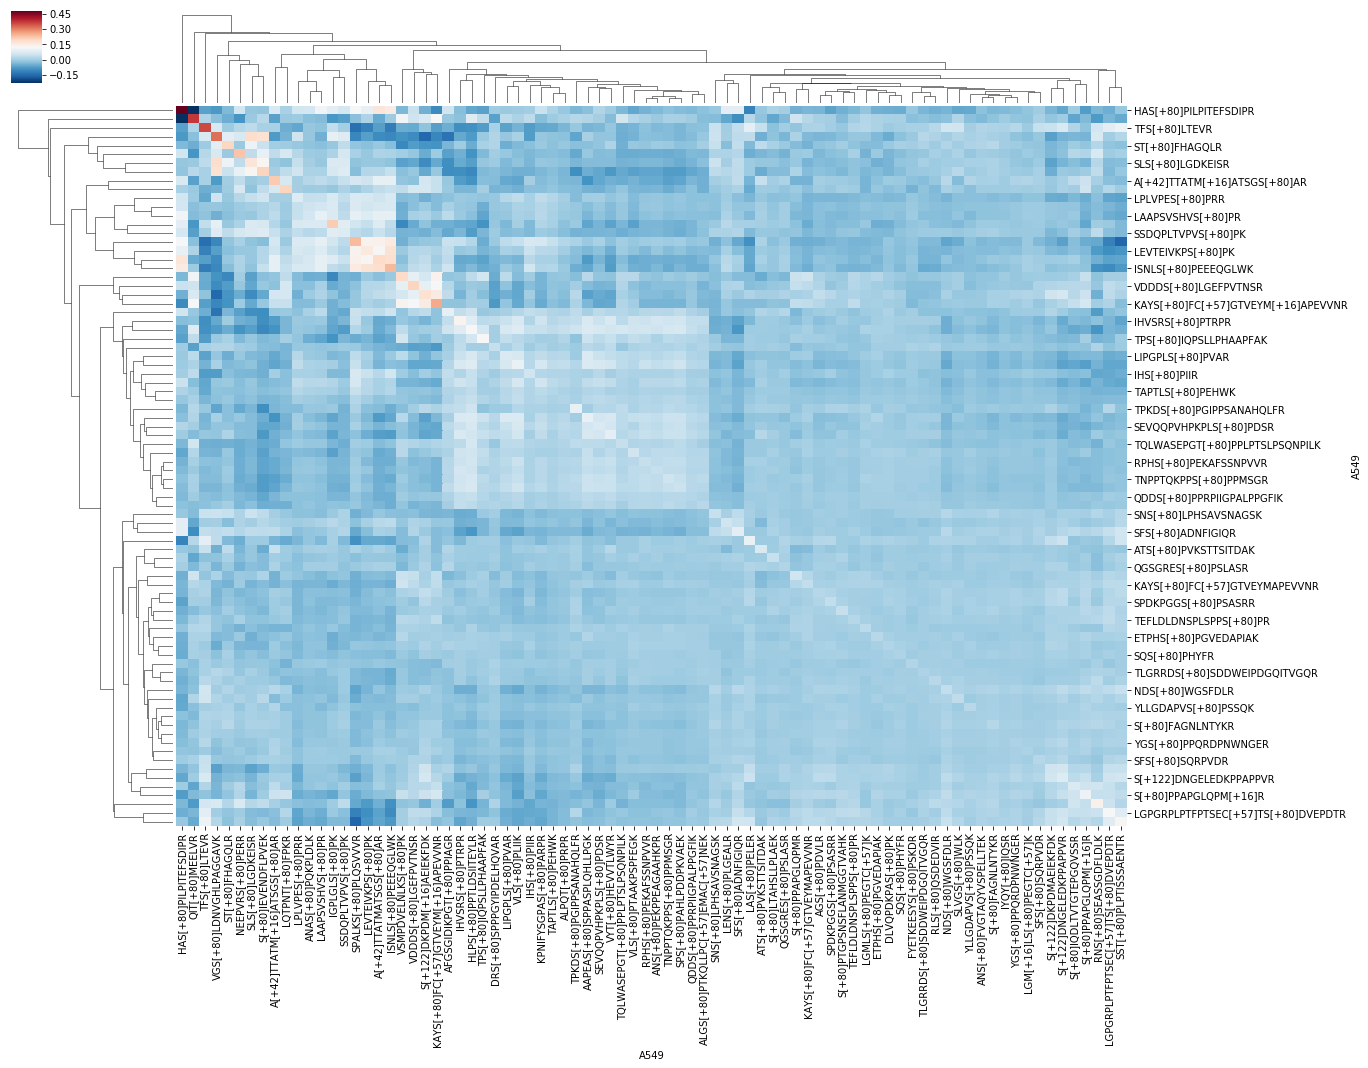

In [77]:
sns.clustermap(df_A549.T.cov(), cmap='RdBu_r', figsize = (20,15));

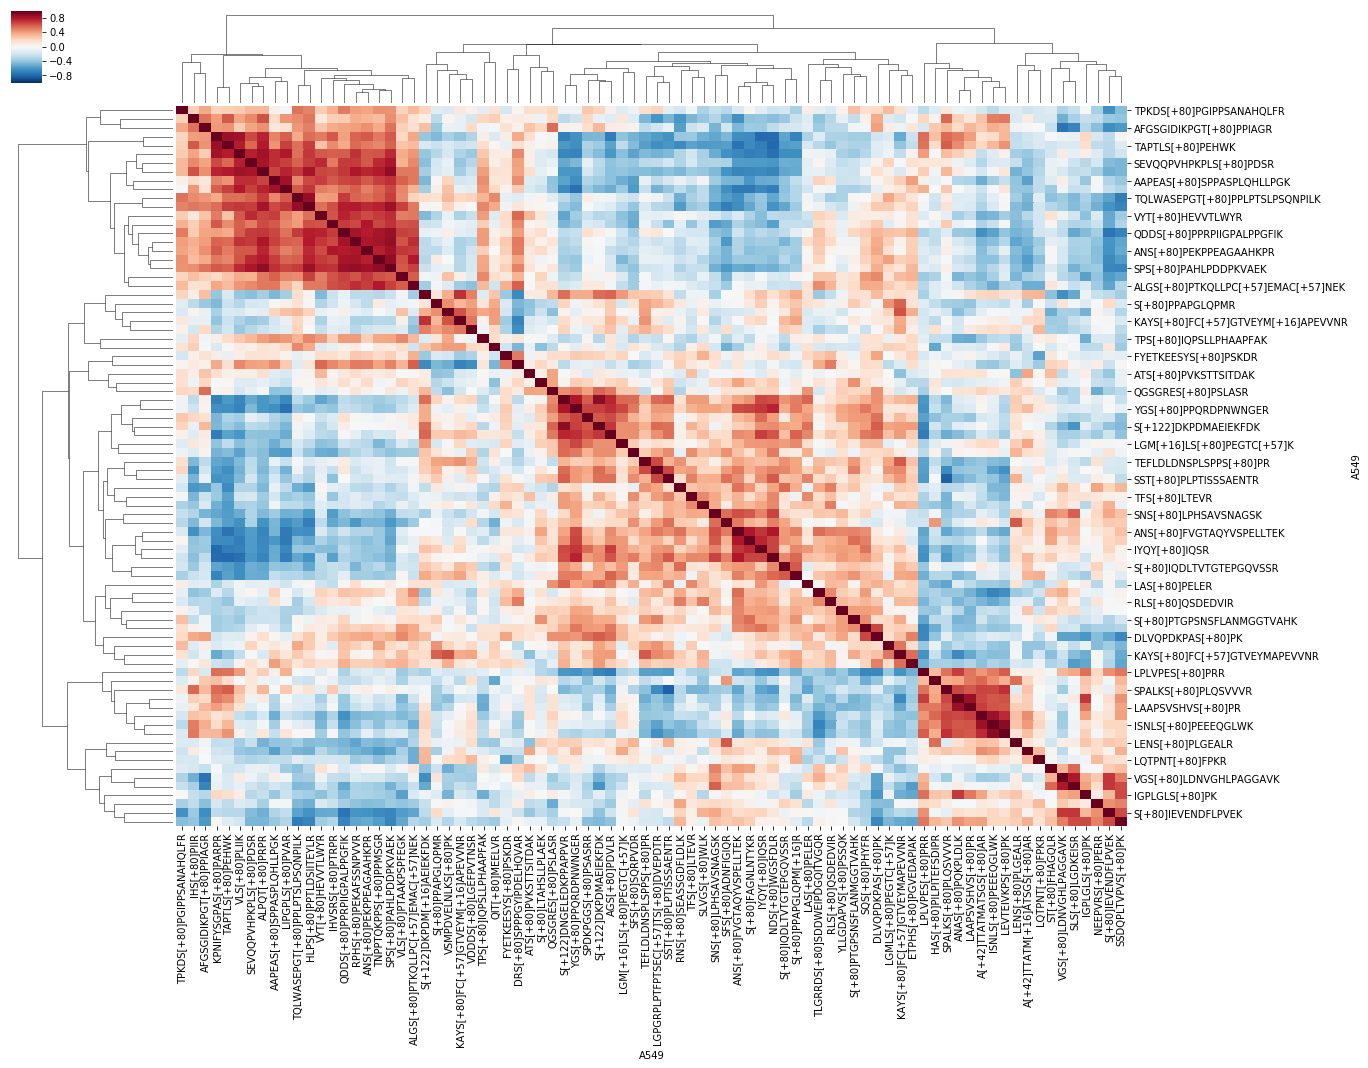

In [136]:
sns.clustermap(df_A549.T.corr(), cmap='RdBu_r', figsize = (20,15), vmin=-1, vmax=1);

In [137]:
# sns.clustermap(df_A549.T.corr('spearman'), cmap='RdBu_r', figsize = (20,15));

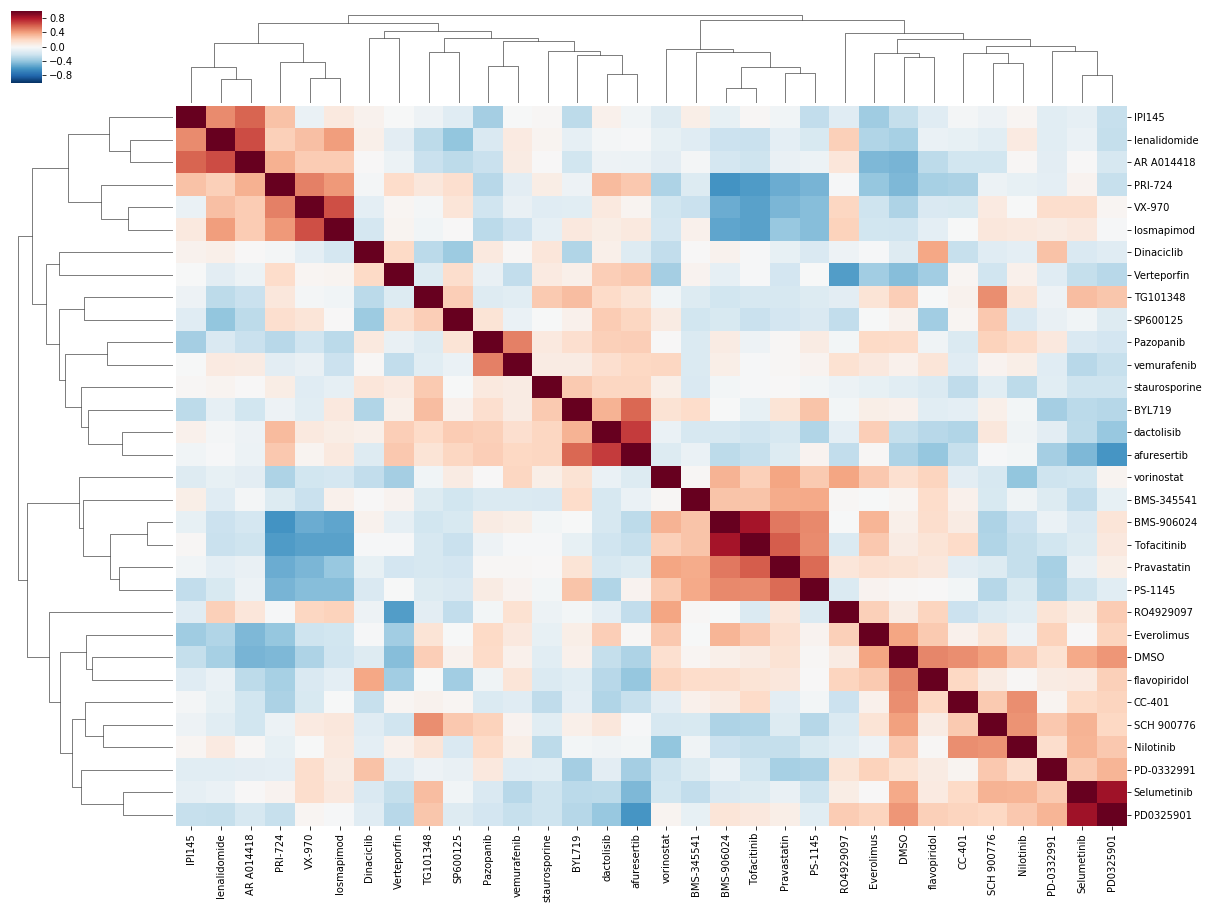

In [138]:
sns.clustermap(df_A549.corr(), cmap='RdBu_r', figsize = (20,15), vmin=-1, vmax=1);

In [44]:
(stats.zscore(df_A549.iloc[0].values)<1.96)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True])

In [24]:
pc = pca_analysis(df_24, 2)

In [26]:
working_lincs_p100['LINCS_P100_DIA_Plate27'].head()

,NPC,DMSO,flavopiridol,CC-401,Pazopanib,Selumetinib,PD-0332991,SCH 900776,Nilotinib,PD0325901,...,dactolisib,IPI145,Tofacitinib,SP600125,afuresertib,staurosporine,Pravastatin,vorinostat,BYL719,PS-1145
19,IYQY[+80]IQSR,-0.019111,0.067164,-0.075369,0.270228,-0.289719,0.117993,-0.083802,0.138025,-0.063086,...,-0.098822,-0.024247,-0.079818,0.113169,0.250750,0.359376,-0.163839,-0.168338,0.067212,0.037752
20,TPKDS[+80]PGIPPSANAHQLFR,-0.321789,-0.740104,0.002915,1.403989,1.419831,-0.005058,0.126698,0.095904,1.506496,...,0.065716,0.171048,-0.300836,0.545009,NaN,2.303235,-0.079442,-0.419472,NaN,0.135255
21,RNS[+80]SEASSGDFLDLK,0.016651,0.185323,0.281689,0.217865,0.409194,0.292825,0.009019,-0.026009,0.032783,...,-0.164875,-0.283713,-0.070025,-0.147616,NaN,0.241553,0.007737,0.217503,-0.289120,-0.195440
22,LPLVPES[+80]PRR,-0.350689,0.105957,0.080687,-0.072312,0.103718,0.249198,0.069509,-0.063781,-0.298971,...,-0.050622,0.081913,-0.071271,-0.178510,-0.483576,-1.421853,-0.145502,-0.113612,0.253167,0.110038
23,ANAS[+80]PQKPLDLK,-0.020958,0.077784,0.248626,0.140105,-0.066004,-0.123369,-0.028936,0.000888,0.096019,...,-0.186858,0.105658,-0.067804,0.127292,0.235807,-0.331835,-0.031517,-0.047442,-0.015651,-0.028860


In [33]:
(stats.zscore(df_NPC['DMSO'].values)>1.96)


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False])

In [189]:
# kinase_lics = ['LINCS_P100_DIA_Plate27',
# 'LINCS_P100_PRM_Plate28',
# 'LINCS_P100_PRM_Plate29_24H',
# 'LINCS_P100_PRM_Plate32',
# 'LINCS_P100_DIA_Plate33'
# 'LINCS_P100_DIA_Plate34',
# ]

# print (working_lincs_p100[kinase_lics[0]].columns[0])
# kinase_colums = [working_lincs_p100[kinase_lics[0]].columns[0] +'_'+ s for s in working_lincs_p100[kinase_lics[0]].columns.values] 
# print (kinase_colums)
# kinase_concat_lincs = working_lincs_p100[kinase_lics[0]].set_index(working_lincs_p100[kinase_lics[0]].columns[0])
# kinase_concat_lincs = kinase_concat_lincs.rename(columns=kinase_colums)
# kinase_concat_lincs.head()
# # for i in range(1,len(kinase_lics)):
# #     print (i, working_lincs_p100[kinase_lics[i]].columns[0])
# #     _ = working_lincs_p100[kinase_lics[i]].set_index(working_lincs_p100[kinase_lics[i]].columns[0])
# #     kinase_concat_lincs = pd.concat([kinase_concat_lincs, _], axis=1)

In [188]:
%%capture
# import graphviz as gv
# def edges(matr):
#     edge = {}
#     for m in matr.columns:
#         for n in matr.index:
#             a,b = m,n 
#             if a > b: #only add edge once
#                 x = matr.at[m, n]
#                 edge[m,n] = float("{0:.4f}".format(x))
#     return edge
# e = edges(df_NPC.T.corr())
# g = gv.Graph(format="png")
# for k, v in e.iteritems():
#     g.edge(k[0], k[1], len=str(v))

#     print str(g)
# abs(df_NPC.T.corr())>0.98
# # for i in range(0, (df_NPC.shape[1])-1):


In [51]:
df_NPC.values

array([[-0.01911069,  0.06716367, -0.0753686 , ..., -0.16833823,
         0.06721154,  0.03775181],
       [-0.32178912, -0.7401043 ,  0.00291492, ..., -0.41947197,
        -0.11095419,  0.13525463],
       [ 0.01665057,  0.18532255,  0.28168898, ...,  0.21750319,
        -0.28911993, -0.19543965],
       ...,
       [-0.03239417,  0.23614882,  0.04942115, ...,  0.19376899,
         0.19189923, -0.13749044],
       [ 0.10798686,  0.40206394, -1.04465521, ..., -0.3475551 ,
        -0.33665045,  0.0132416 ],
       [-0.18710086, -0.10456177,  0.29483033, ..., -0.01117181,
         0.13033343,  0.01158523]])